<a href="https://colab.research.google.com/github/GavinHenderson1337/Data-Science-Projects/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Customer Satisfaction for Airline

## Step 1. Loading and Cleaning

In [1]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Brings in the Drive to the notebook
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# Import our csv
import pandas as pd
file_path = '/content/drive/My Drive/ML Final Project/Airline_Dataset.csv'  # Update with your file name
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    # Manual Reading -> need to store file to local memory
    df = pd.read_csv("Airline_Dataset.csv")


In [3]:
# Print the shape of the dataset

print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 129880 rows and 25 columns.


In [4]:
# Display first 5 rows of Raw Data
display(df.head())

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


We are aiming to predict whether the Customer was Satisfied or Not

In [5]:
# Information about Dataset
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

None

In [6]:
# Print Summary Statistics
display(df.describe(include = "all"))

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,129880.000000,129880.000000,129880,129880,129880.000000,129880,129880,129880.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880
unique,NaN,NaN,2,2,NaN,2,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied
freq,NaN,NaN,65899,106100,NaN,89693,62160,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73452
mean,44158.700000,64940.500000,NaN,NaN,39.427957,NaN,NaN,1190.316392,2.728696,3.057599,...,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129,NaN
std,31207.377062,37493.270818,NaN,NaN,15.119360,NaN,NaN,997.452477,1.329340,1.526741,...,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650,NaN
min,0.000000,1.000000,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16234.750000,32470.750000,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,NaN
50%,38963.500000,64940.500000,NaN,NaN,40.000000,NaN,NaN,844.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,NaN
75%,71433.250000,97410.250000,NaN,NaN,51.000000,NaN,NaN,1744.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,NaN


In [7]:
# Count duplicates and missing values
num_duplicates = df.duplicated().sum()
missing_values = df.isnull().sum()

# Display the results
print(f"Number of duplicate rows: {num_duplicates}")
print("\nMissing values per column:")
print(missing_values)

Number of duplicate rows: 0

Missing values per column:
Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
A

In [8]:
# Drop Duplicates
df.drop_duplicates(inplace=True)

In [9]:
# Handle missing values
df.dropna(inplace = True)

In [10]:
# Display Columns names
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [11]:
# Drop irrelevant features
df.drop(columns =['Unnamed: 0', 'id'], inplace = True)

In [12]:
# Print the shape of the dataset

print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 129487 rows and 23 columns.


Handling Outliers

## Step 2. EDA

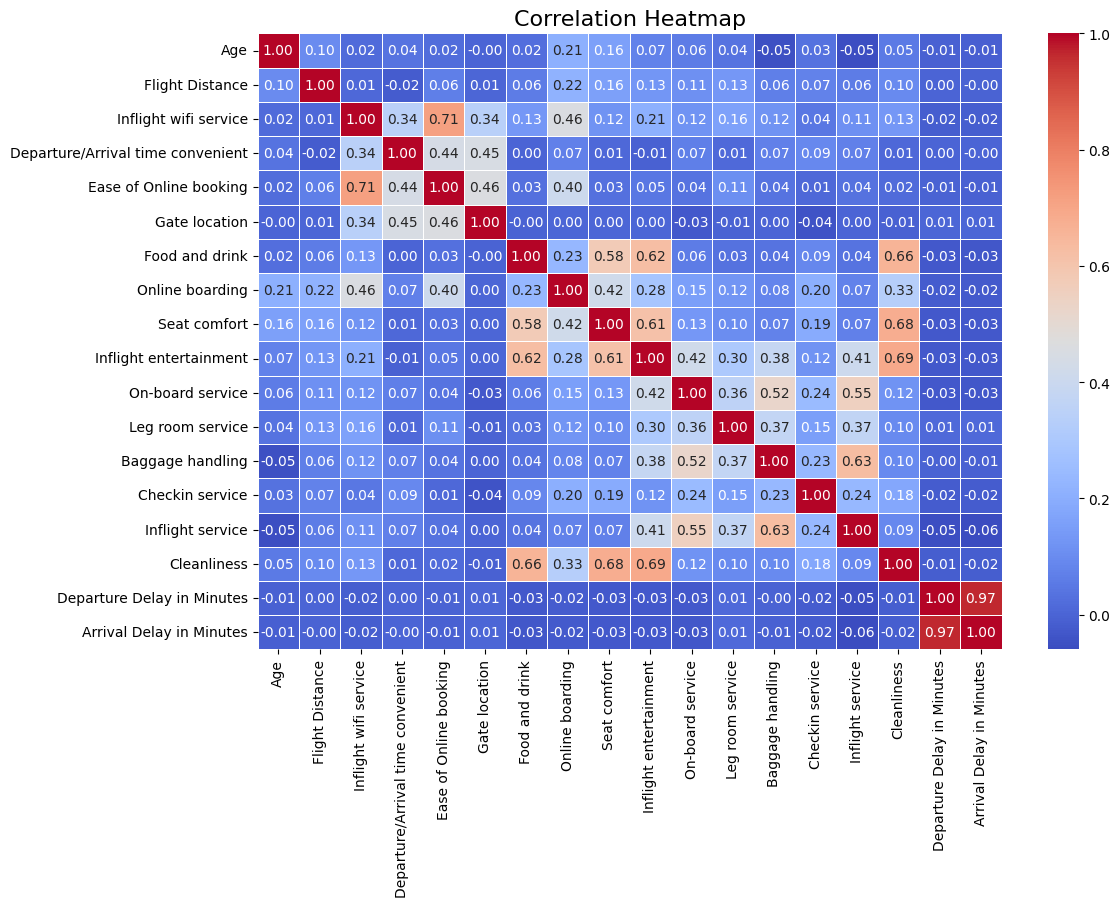

In [13]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Generate a heatmap for the correlation matrix
plt.figure(figsize=(12, 8))  # Set the figure size
correlation_matrix = numerical_df.corr()  # Compute the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add a title
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [14]:
# Feature Engineering to handle multicolinearity
df['Total_Delay'] = df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']

In [15]:
# Now we remove the original instances
df.drop(['Departure Delay in Minutes', 'Arrival Delay in Minutes'], axis=1, inplace=True)

### Handling Multicollinearity: Combining Departure and Arrival Delays

During the exploratory data analysis (EDA), a strong positive correlation (0.97) was observed between the 'Departure Delay in Minutes' and 'Arrival Delay in Minutes' features. This high correlation indicates multicollinearity, which can negatively impact the performance and interpretability of machine learning models.

To address this issue, a decision was made to combine these two features into a single feature called 'Total_Delay'. This new feature is calculated as the sum of 'Departure Delay in Minutes' and 'Arrival Delay in Minutes', representing the overall delay experienced by the passenger.

**Rationale for Combining Features:**

* **Reducing Multicollinearity:** Combining highly correlated features reduces redundancy in the data and mitigates the issue of multicollinearity.
* **Simplified Model:** Using a single feature instead of two highly correlated ones simplifies the model and potentially improves its interpretability.
* **Preserving Information:** The 'Total_Delay' feature captures the essence of both original features, preserving the information about the overall delay experience.

**Implementation:**

The following steps were taken to implement this feature engineering approach:

1. **Create 'Total_Delay' Feature:** A new column named 'Total_Delay' was created by summing the values of 'Departure Delay in Minutes' and 'Arrival Delay in Minutes' for each row.
2. **Drop Original Features:** The original 'Departure Delay in Minutes' and 'Arrival Delay in Minutes' columns were removed from the dataset, as they are now represented by the 'Total_Delay' feature.

**Expected Benefits:**

This feature engineering approach is expected to:

* Improve the performance and stability of machine learning models by reducing multicollinearity.
* Enhance model interpretability by using a single, more comprehensive feature.
* Maintain the essential information about flight delays.

**Further Considerations:**

While combining features is a common and effective way to handle multicollinearity, alternative approaches like principal component analysis (PCA) or feature selection methods could be explored in future iterations of the analysis.



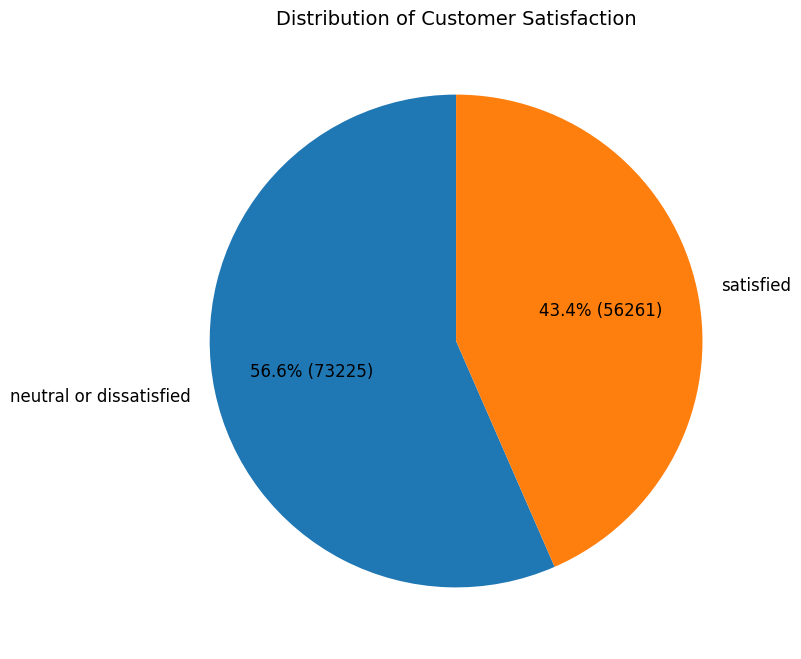

In [16]:
# Assuming 'df' is your DataFrame and 'satisfaction' is the column of interest
satisfaction_counts = df['satisfaction'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
plt.pie(satisfaction_counts, labels=satisfaction_counts.index, autopct=lambda pct: f'{pct:.1f}% ({int(pct/100.*satisfaction_counts.sum())})',
        startangle=90, textprops={'fontsize': 12})
plt.title('Distribution of Customer Satisfaction', fontsize=14)
plt.show()



Since the distribution of the classes is balanced we do not need to use SMOTE.

### Univariate Analysis

#### Association of Categorical Features on Dependent Variable

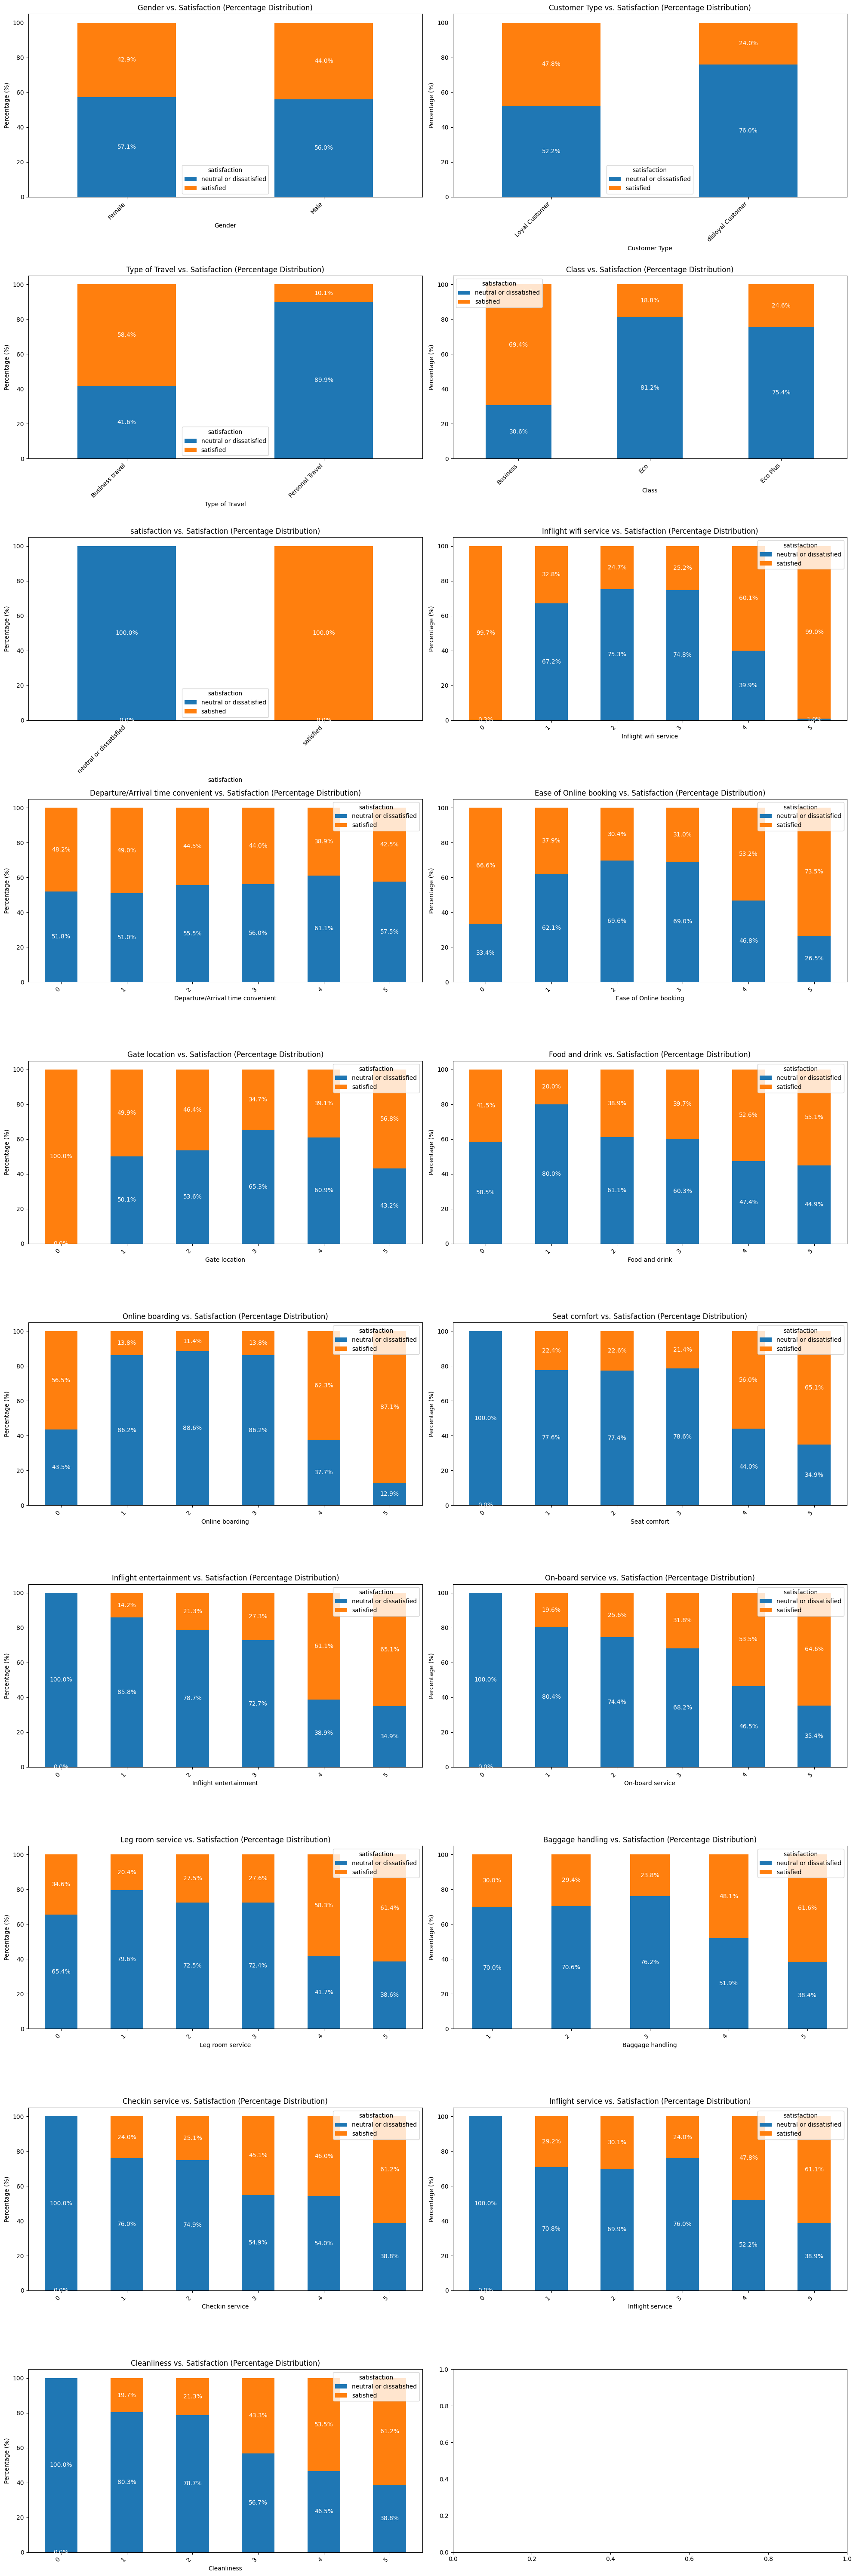

In [17]:
# Identify categorical and rating features (excluding specified columns)
categorical_features = df.select_dtypes(include=['object', 'category']).columns
rating_features = df.select_dtypes(include=['number']).columns  # Select numerical features
excluded_features = ['Age', 'Flight Distance', 'Total_Delay', 'Total_Delay_log']  # Exclude specific features
rating_features = [feature for feature in rating_features if feature not in excluded_features]
categorical_features = [feature for feature in categorical_features if feature not in excluded_features]
all_features = categorical_features + rating_features  # Combine features

# Create plots for all features in a book-like layout
num_features = len(all_features)
num_rows = (num_features + 1) // 2  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, 2, figsize=(20, num_rows * 6))  # Create subplots

for i, feature in enumerate(all_features):
    row = i // 2
    col = i % 2

    # Create cross-tabulation for percentage calculation
    ct = pd.crosstab(df[feature], df['satisfaction'], normalize='index') * 100

    # Create stacked bar chart on the corresponding subplot
    ax = ct.plot(kind='bar', stacked=True, ax=axes[row, col])
    ax.set_title(f'{feature} vs. Satisfaction (Percentage Distribution)')
    ax.set_xlabel(feature)
    ax.set_ylabel('Percentage (%)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Add percentage labels inside the bars
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', color='white')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

#### Distribution of Numerical Features

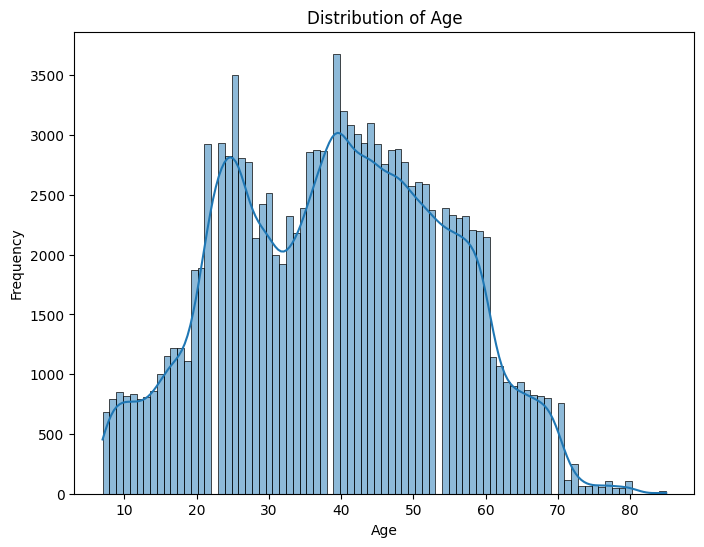

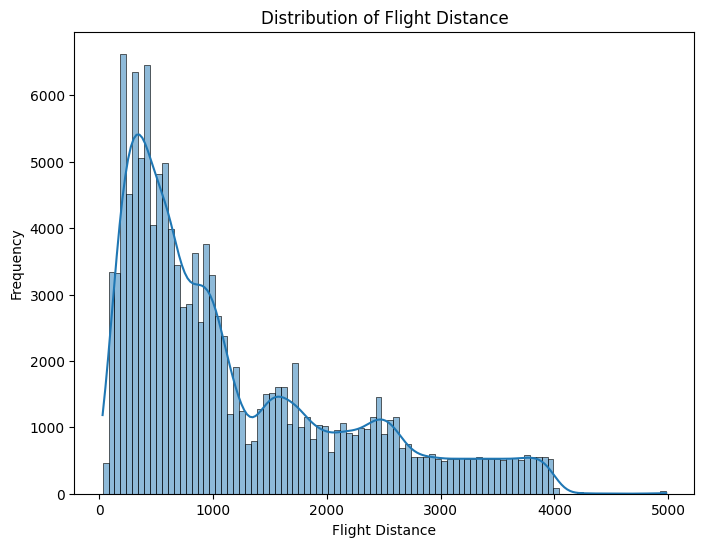

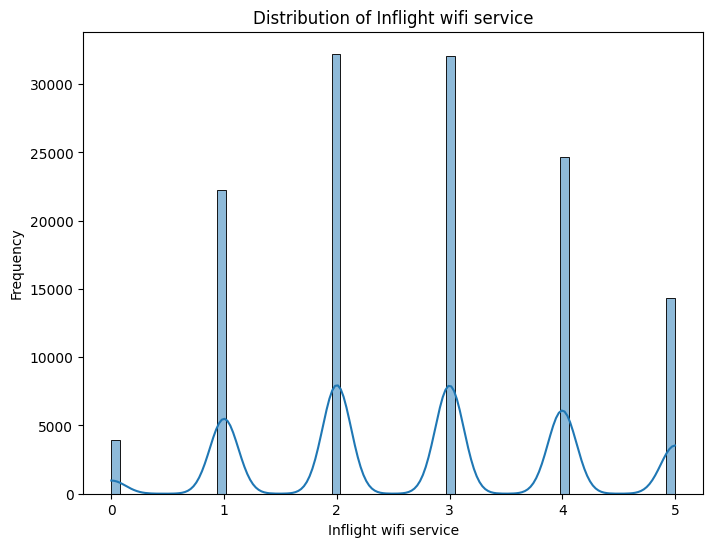

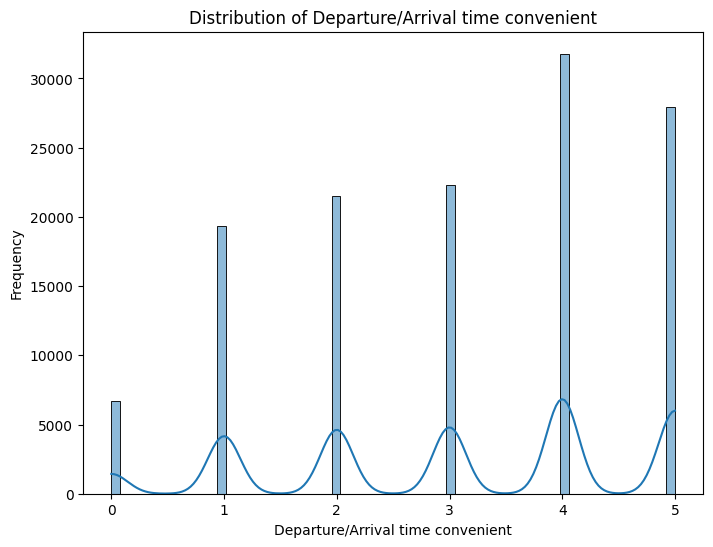

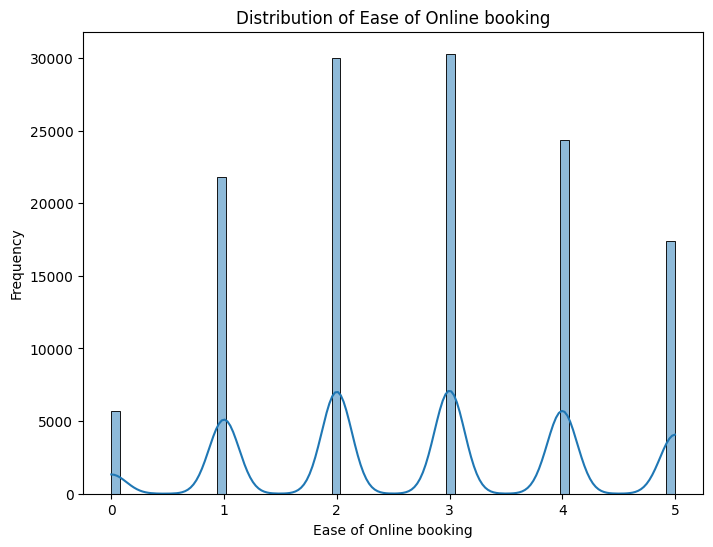

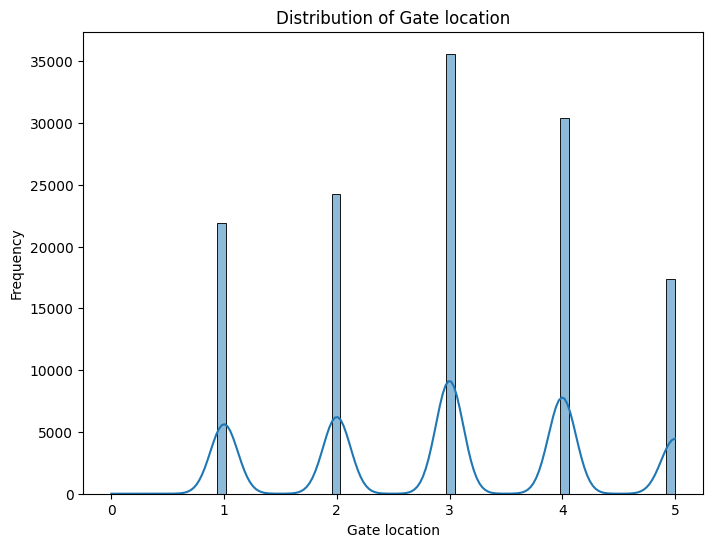

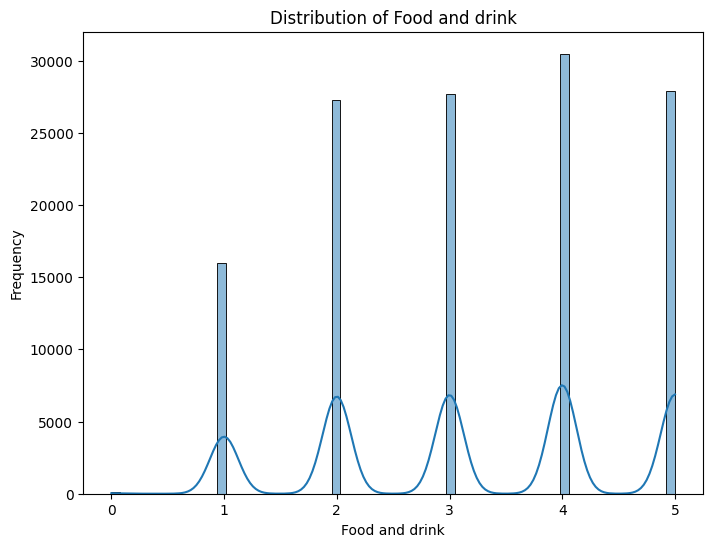

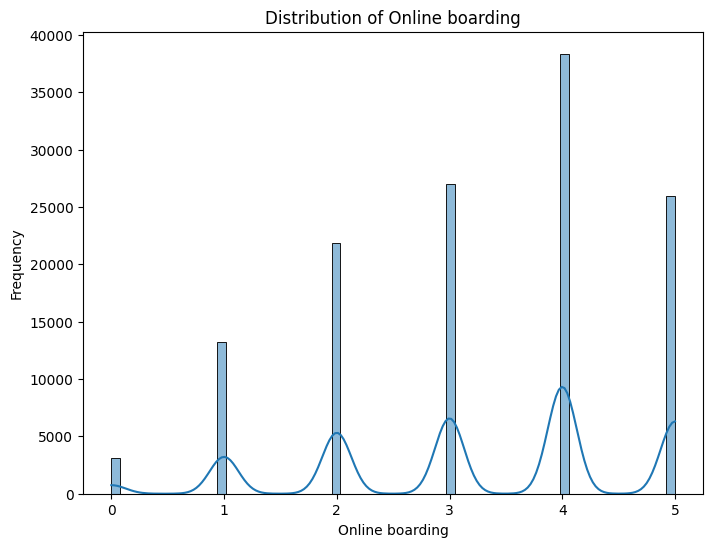

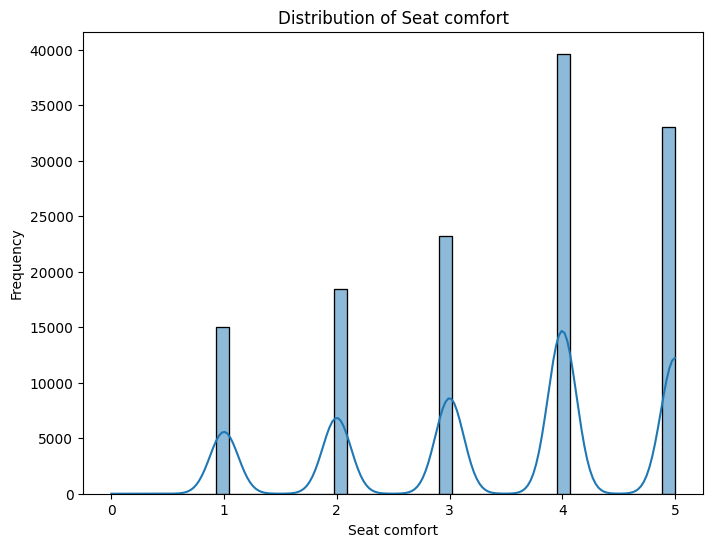

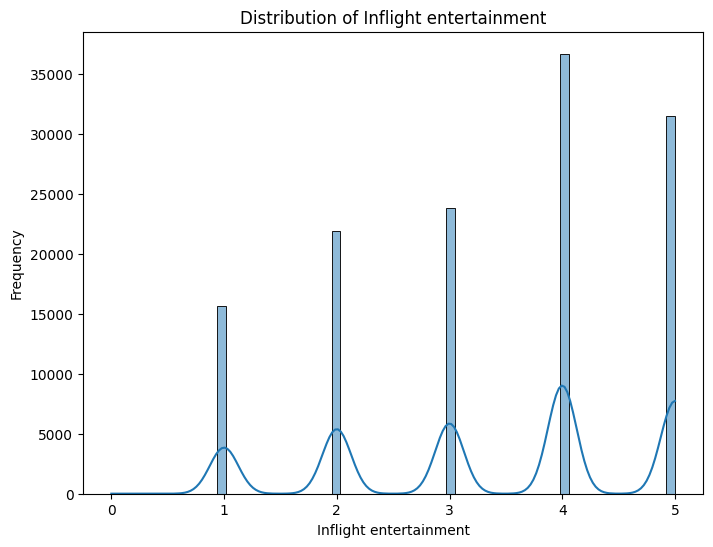

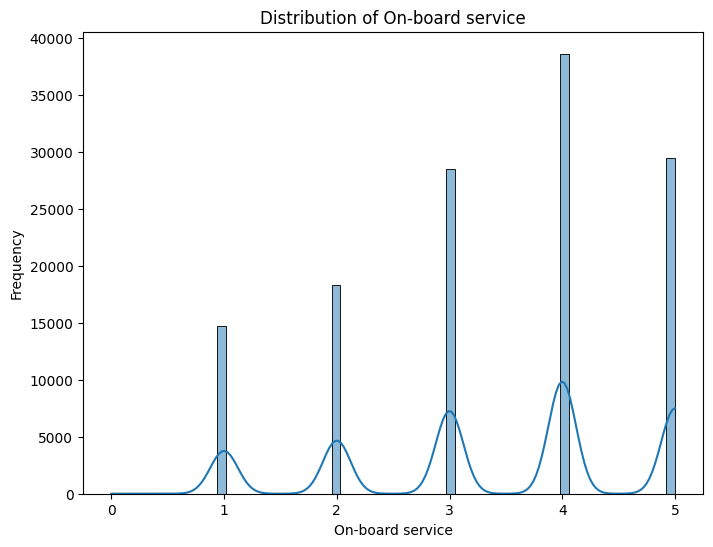

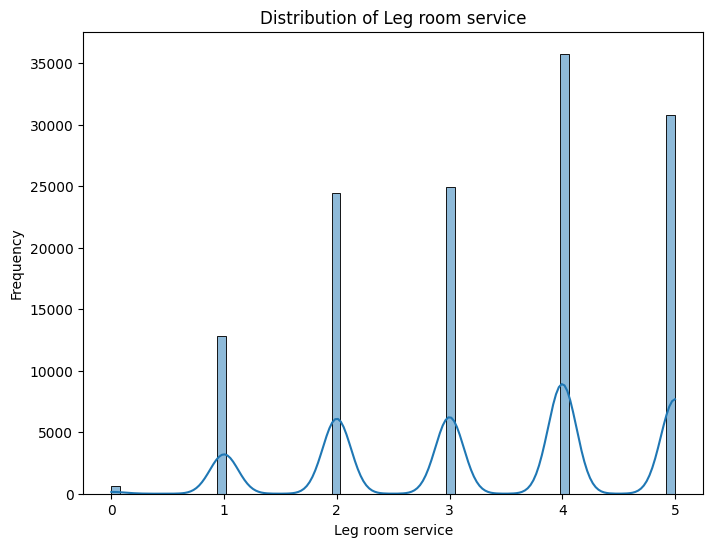

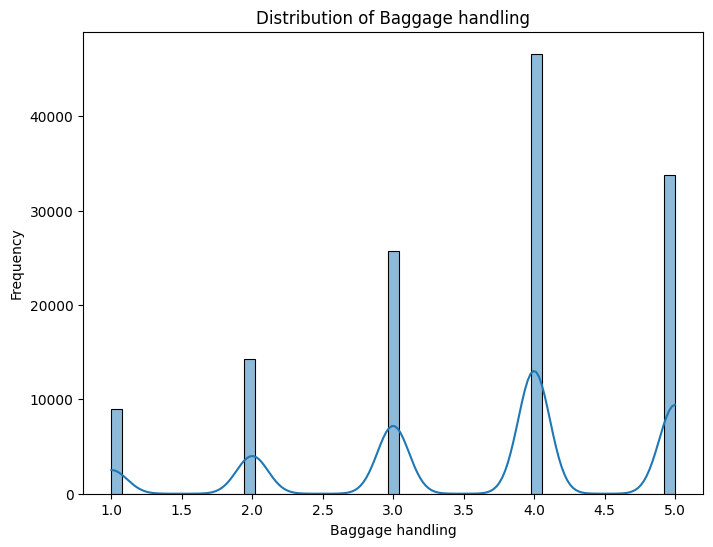

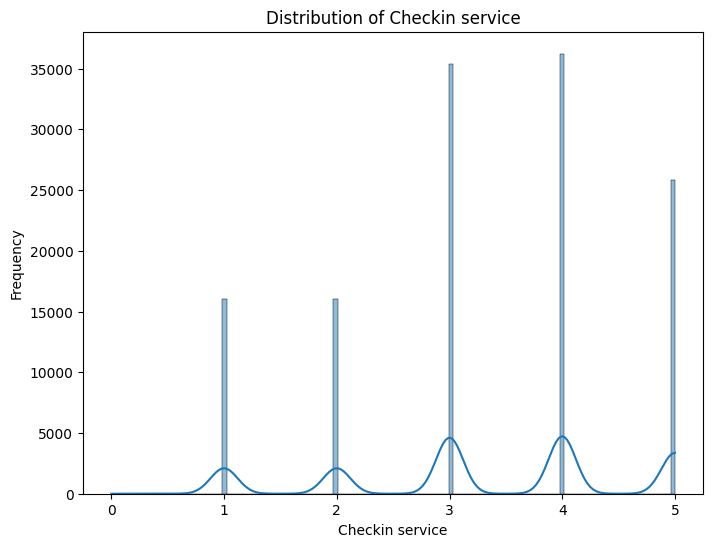

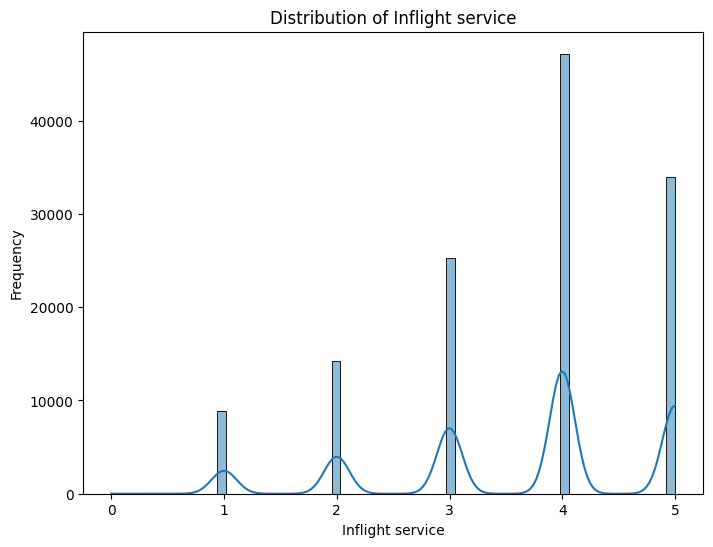

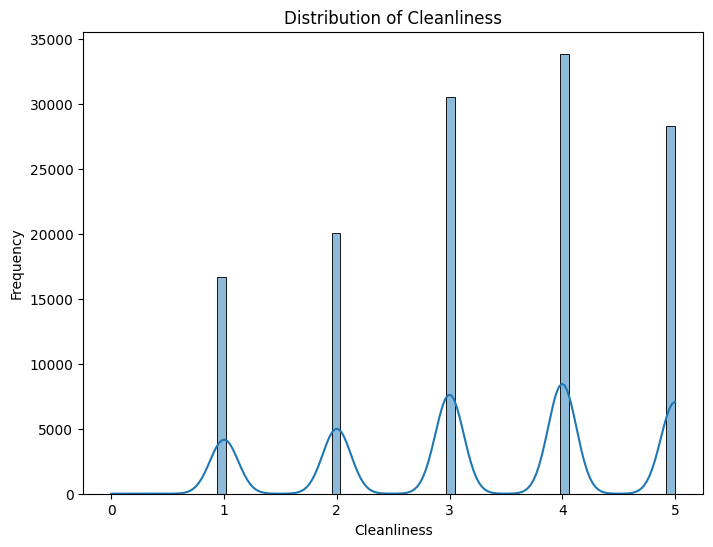

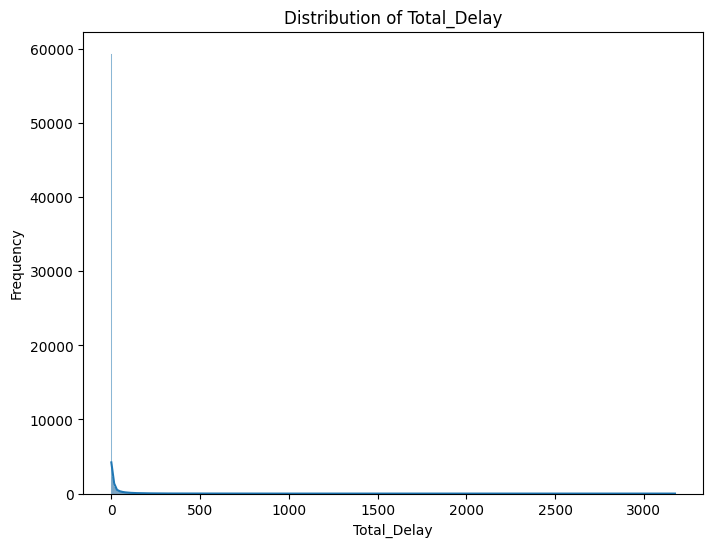

In [18]:
numerical_features = df.select_dtypes(include=['number']).columns

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True)  # kde adds a kernel density estimate curve
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

### Addressing Outliers in Total_Delay: Logarithmic Transformation
During exploratory data analysis (EDA), it was observed that the 'Total_Delay' feature exhibits a right-tailed skew, indicating the presence of outliers. These extreme values can negatively impact the performance and interpretability of machine learning models.

To mitigate the influence of outliers, a logarithmic transformation will be applied to the 'Total_Delay' feature, creating a new feature called 'Total_Delay_log'. This transformation compresses the range of larger values, reducing the impact of extreme values while preserving the relative differences between smaller values.

**Rationale for Logarithmic Transformation**:



*   **Reducing Outlier Influence**: Logarithmic transformations are effective in reducing the impact of outliers by compressing the range of larger values. This helps to create a more symmetric distribution and reduce the influence of extreme values on model training.
*   **Stabilizing Variance**: They can also help stabilize variance, which is often beneficial for machine learning models. Variance that increases with the mean can lead to unstable models and unreliable predictions.
*    **Interpretability**: While the transformed values are on a different scale, the relationship between the transformed feature and the target variable is often preserved, allowing for meaningful interpretations.


**Implementation**:

The logarithmic transformation will be implemented using the **np.log1p()** function in Python. This function applies the logarithm of 1 plus the value, which is preferred over log for handling zero values, as **log(0)** is undefined. The transformed values will be stored in a new column called **'Total_Delay_log'**.

In [19]:
# Apply logarithmic transformation to 'Total_Delay'
df['Total_Delay_log'] = np.log1p(df['Total_Delay'])

# Optionally, drop the original 'Total_Delay' column
# df.drop('Total_Delay', axis=1, inplace=True)

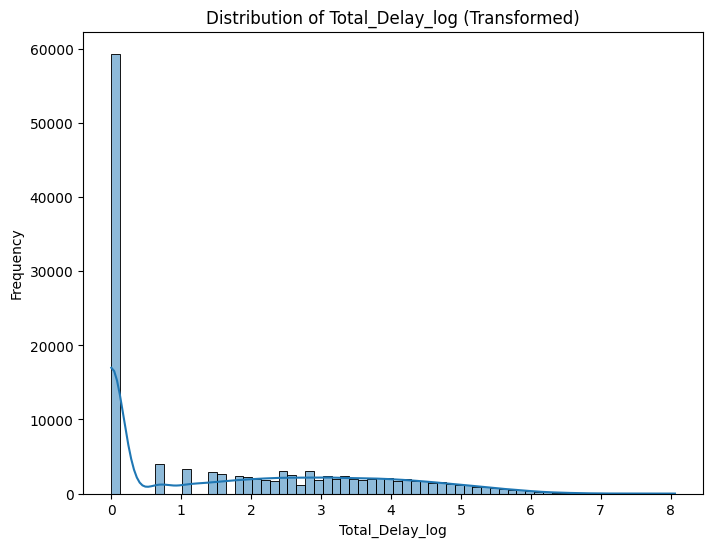

In [20]:
# Create a histogram of the 'Total_Delay_log' column
plt.figure(figsize=(8, 6))  # Set the figure size
sns.histplot(df['Total_Delay_log'], kde=True)  # Create the histogram with a kernel density estimate
plt.title('Distribution of Total_Delay_log (Transformed)')  # Set the plot title
plt.xlabel('Total_Delay_log')  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label
plt.show()  # Display the plot

### Addressing Outliers in Flight Distance: IQR Method

Outliers in the 'Flight Distance' feature were identified and removed using the Interquartile Range (IQR) method. This involved calculating the upper and lower bounds based on the IQR and filtering data points outside these bounds. This approach helps to reduce the influence of extreme values on model training and improve overall performance.

In [21]:

# Print shape before outlier removal
print(f"Shape before outlier removal: {df.shape}")

# Calculate quantiles
Q1 = df['Flight Distance'].quantile(0.25)
Q3 = df['Flight Distance'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Filter data within bounds
filtered_df = df[(df['Flight Distance'] >= lower_bound) & (df['Flight Distance'] <= upper_bound)]

# Print shape after outlier removal
print(f"Shape after outlier removal: {filtered_df.shape}")

# Replace original DataFrame
df = filtered_df

Shape before outlier removal: (129487, 23)
Shape after outlier removal: (126640, 23)


### Categorical Analysis( Chi- Square)


In [22]:
from scipy.stats import chi2_contingency

def chi2_analysis(df, categorical_features, target, alpha=0.05):
    """
    Performs Chi-squared test for association between categorical features and the target variable.
    Prints a concise output with hypothesis, significant features, and their p-values.

    Args:
        df: The pandas DataFrame containing the data.
        categorical_features: A list of column names representing the categorical features.
        target: The name of the target variable column.
        alpha: Significance level (default: 0.05).

    Returns:
        None (prints the results)
    """

    print("Null Hypothesis: There is no association between the categorical features and the target variable.")
    print("Alternative Hypothesis: There is an association between the categorical features and the target variable.")
    print("-" * 20)

    print("Significant Features:")  # Print the header for significant features
    for feature in categorical_features:
        contingency_table = pd.crosstab(df[feature], df[target])
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        if p < alpha:
            print(f"- {feature}: p-value = {p:.3f}")  # Print significant features with p-values


In [23]:
categorical_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']  # Include all categorical features
target_variable = 'satisfaction'


chi2_analysis(df, categorical_features, target_variable)


Null Hypothesis: There is no association between the categorical features and the target variable.
Alternative Hypothesis: There is an association between the categorical features and the target variable.
--------------------
Significant Features:
- Gender: p-value = 0.000
- Customer Type: p-value = 0.000
- Type of Travel: p-value = 0.000
- Class: p-value = 0.000
- Inflight wifi service: p-value = 0.000
- Departure/Arrival time convenient: p-value = 0.000
- Ease of Online booking: p-value = 0.000
- Gate location: p-value = 0.000
- Food and drink: p-value = 0.000
- Online boarding: p-value = 0.000
- Seat comfort: p-value = 0.000
- Inflight entertainment: p-value = 0.000
- On-board service: p-value = 0.000
- Leg room service: p-value = 0.000
- Baggage handling: p-value = 0.000
- Checkin service: p-value = 0.000
- Inflight service: p-value = 0.000
- Cleanliness: p-value = 0.000


So we can reject the null hypothesis for these variables that the categorical features are not significantly associated with the target variable

## Step 3. Preprocessing

Alongside the edits made above, we should make modifications to the data to make the data perform better in machine learning models.



### Splitting Train/Test Data

In [24]:
# Perform training and testing split
from sklearn.model_selection import train_test_split
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Encoding Categorical Variables

In [25]:
# We need to encode our target variable - we can use LabelEncoder for this
# We also need to encode our features using ordinal
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
le = LabelEncoder()
oe = OrdinalEncoder()
# Since this group has more than 2 classes, specifically give an order
oe_class = OrdinalEncoder(categories=[['Eco', 'Eco Plus', 'Business']])

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

encoded_features = ['Gender', 'Customer Type', 'Type of Travel']
X_train[encoded_features] = oe.fit_transform(X_train[encoded_features])
X_test[encoded_features] = oe.transform(X_test[encoded_features])

X_train['Class'] = oe_class.fit_transform(X_train[['Class']])
X_test['Class'] = oe_class.transform(X_test[['Class']])

In [26]:
display(X_train)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Total_Delay,Total_Delay_log
103581,1.0,0.0,26,0.0,2.0,834,1,1,1,1,...,3,3,3,1,4,3,4,3,6.0,1.945910
110538,1.0,0.0,10,1.0,0.0,1726,4,1,4,3,...,3,3,1,5,4,2,4,3,0.0,0.000000
28441,1.0,0.0,57,0.0,2.0,1107,3,3,3,3,...,4,5,5,4,5,3,5,4,1.0,0.693147
18916,0.0,0.0,46,1.0,2.0,247,2,5,2,3,...,5,1,1,2,1,4,1,4,0.0,0.000000
108355,0.0,1.0,22,0.0,0.0,1014,3,2,2,2,...,3,3,4,4,3,3,2,3,205.0,5.327876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122950,0.0,0.0,52,0.0,2.0,3489,3,3,3,3,...,3,4,4,4,3,2,4,3,10.0,2.397895
106332,0.0,0.0,40,1.0,2.0,583,4,4,4,2,...,4,5,5,4,5,5,5,4,0.0,0.000000
880,1.0,0.0,55,0.0,0.0,667,1,1,1,1,...,1,1,4,1,3,4,3,1,52.0,3.970292
16188,0.0,0.0,69,1.0,0.0,853,2,1,2,3,...,4,3,3,2,5,3,3,4,0.0,0.000000


In [27]:
X_train.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Total_Delay', 'Total_Delay_log'],
      dtype='object')

In [28]:
display(X_test)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Total_Delay,Total_Delay_log
18881,0.0,0.0,57,0.0,2.0,2665,2,2,2,2,...,3,2,2,2,2,1,2,1,33.0,3.526361
105081,1.0,1.0,22,0.0,2.0,1182,0,0,0,5,...,1,1,1,3,3,1,1,1,0.0,0.000000
29443,1.0,0.0,45,1.0,1.0,733,3,4,3,1,...,2,2,4,3,3,1,2,2,86.0,4.465908
71619,1.0,0.0,39,1.0,0.0,413,2,4,2,1,...,3,3,4,5,4,5,4,3,116.0,4.762174
11406,1.0,1.0,28,0.0,2.0,862,2,3,3,5,...,3,4,4,5,5,3,5,3,320.0,5.771441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34944,1.0,0.0,54,0.0,2.0,1972,3,1,3,3,...,5,4,4,4,4,5,4,4,9.0,2.302585
33238,1.0,0.0,67,1.0,0.0,715,1,1,1,3,...,2,2,1,4,4,2,3,2,28.0,3.367296
100445,0.0,0.0,75,0.0,0.0,102,5,1,1,1,...,2,5,5,5,5,3,5,4,0.0,0.000000
39255,1.0,0.0,8,1.0,0.0,765,3,5,3,1,...,5,3,4,2,5,5,5,3,66.0,4.204693


### Scaling Features

In [29]:
# We also need to scale our features -> Use Standard Scaler
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Recursive Feature Elimination

In [30]:
# Lastly, create a second, smaller feature space using RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
estimator = LogisticRegression(max_iter=1000)
rfe = RFE(estimator, n_features_to_select=10)  # Select top 10 features
rfe.fit(X_train, y_train)
RFE_X_train = rfe.transform(X_train)
RFE_X_test = rfe.transform(X_test)

In [31]:
# For models trained later, they will be assessed based on time and performance, trained with both the regular and RFE feature spaces

In [32]:
display(X_train)

array([[ 1.01499716, -0.47957505, -0.87915911, ..., -0.21306351,
        -0.31220059,  0.14316412],
       [ 1.01499716, -0.47957505, -1.9333452 , ..., -0.21306351,
        -0.39108536, -0.90795578],
       [ 1.01499716, -0.47957505,  1.16332642, ...,  0.54697629,
        -0.3779379 , -0.53353931],
       ...,
       [ 1.01499716, -0.47957505,  1.03155316, ..., -1.73314312,
         0.29258269,  1.23667194],
       [-0.98522443, -0.47957505,  1.95396598, ...,  0.54697629,
        -0.39108536, -0.90795578],
       [-0.98522443,  2.08517936, -0.81327248, ..., -0.97310332,
        -0.25961074,  0.38731237]])

## Step 4. Model Training

Import necessary libraries

In [33]:
# import time for measuring training time
import time

In [34]:
## Import necessary libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV


In [35]:
# Neural Network
# Due to constraints related to training time and processing power, we will stick to only 3 hidden layers.
# We will need to import Keras.
import keras
import tensorflow as tf


In [36]:
X_train.shape

(101312, 22)

In [37]:
RFE_X_train.shape

(101312, 10)

In [38]:
y_train.shape

(101312,)

### XGBoost (Gavin)


In [39]:
import xgboost as xgb


# Create the XGBoost Classifier

param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic')

# Create GridSearchCV object
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, scoring='accuracy', cv=5)

# Start the timer
start_time_xgb = time.time()

# Fit the model to the training data
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search_xgb.best_params_
best_model_xgb = grid_search_xgb.best_estimator_

# Make predictions on the test data
y_pred_xgb = best_model_xgb.predict(X_test)

print(f"Best parameters are {best_params}")

# End the timer
end_time_xgb = time.time()

# Calculate and print the elapsed time
elapsed_time_xgb = end_time_xgb - start_time_xgb
print(f"Elapsed time: {elapsed_time_xgb:.2f} seconds")


Best parameters are {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}
Elapsed time: 110.58 seconds


In [40]:
# Train on RFE Dataset


# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic')

# Create GridSearchCV object
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, scoring='accuracy', cv=5)

# Start the timer
start_time_xgb_rfe = time.time()

# Fit the model to the RFE training data
grid_search_xgb.fit(RFE_X_train, y_train)

# Get the best parameters and model
best_params = grid_search_xgb.best_params_
best_model = grid_search_xgb.best_estimator_

# Make predictions on the RFE test data
rfe_y_pred_xgb = best_model.predict(RFE_X_test)

print(f"Best parameters: {best_params}")

# End the timer
end_time_xgb_rfe = time.time()

# Calculate and print the elapsed time
elapsed_time_xgb_rfe = end_time_xgb_rfe - start_time_xgb_rfe
print(f"Elapsed time: {elapsed_time_xgb_rfe:.2f} seconds")


Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}
Elapsed time: 75.78 seconds


### Neural Networks (Sebastian)

In [41]:
# Regular Model
nn_model = keras.Sequential([
    keras.layers.Input(shape = (X_train.shape[1],)),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])
nn_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [42]:
# Reduced Feature Space Model
nn_RFE_model = keras.Sequential([
    keras.layers.Input(shape = (RFE_X_train.shape[1],)),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])
nn_RFE_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [43]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10) # early stopping callback, tracking val_loss

In [44]:
# Train the regular model
start_time = time.time()
nn_model.fit(X_train, y_train, epochs = 100, batch_size = 64, validation_split = 0.10, callbacks=[es_callback])
end_time = time.time()
nn_train_time = end_time - start_time
print(f"Training time: {end_time - start_time} seconds")

Epoch 1/100
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9088 - loss: 0.2144 - val_accuracy: 0.9502 - val_loss: 0.1200
Epoch 2/100
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9507 - loss: 0.1198 - val_accuracy: 0.9551 - val_loss: 0.1096
Epoch 3/100
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9554 - loss: 0.1060 - val_accuracy: 0.9591 - val_loss: 0.1059
Epoch 4/100
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9579 - loss: 0.0987 - val_accuracy: 0.9581 - val_loss: 0.0993
Epoch 5/100
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9593 - loss: 0.0948 - val_accuracy: 0.9608 - val_loss: 0.0933
Epoch 6/100
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9612 - loss: 0.0907 - val_accuracy: 0.9618 - val_loss: 0.0944
Epoch 7/100
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9626 - loss: 0.0863 - val_accuracy: 0.9626 - val_loss: 0.0900
Epoch 8/100
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9624 - loss: 

In [45]:
# Fit the reduced feature model
start_time = time.time()
nn_RFE_model.fit(RFE_X_train, y_train, epochs = 100, batch_size = 64, validation_split = 0.10, callbacks=[es_callback])
end_time = time.time()
nn_RFE_train_time = end_time - start_time
print(f"Training time: {end_time - start_time} seconds")

Epoch 1/100
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9105 - loss: 0.2132 - val_accuracy: 0.9344 - val_loss: 0.1572
Epoch 2/100
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9370 - loss: 0.1469 - val_accuracy: 0.9434 - val_loss: 0.1343
Epoch 3/100
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9411 - loss: 0.1370 - val_accuracy: 0.9393 - val_loss: 0.1375
Epoch 4/100
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9424 - loss: 0.1350 - val_accuracy: 0.9464 - val_loss: 0.1267
Epoch 5/100
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9451 - loss: 0.1301 - val_accuracy: 0.9464 - val_loss: 0.1303
Epoch 6/100
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9431 - loss: 0.1307 - val_accuracy: 0.9464 - val_loss: 0.1270
Epoch 7/100
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9457 - loss: 0.1273 - val_accuracy: 0.9491 - val_loss: 0.1240
Epoch 8/100
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9460 - loss: 0

### Logistic Regression (Oscar)

In [46]:
# source https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression
# Regular Logistic Regression with timing

start_time_logiReg = time.time()  # Start timer for regular Logistic Regression

param_grid_logiReg = {
   'penalty': ["l1", "l2", "elasticnet", "none"],
  'max_iter': [ 50, 100, 250],
   "C": [0.5, 0.75, 1, 1.25, 1.50]
}

logiReg = LogisticRegression()

grid_search_logiReg = GridSearchCV(logiReg, param_grid_logiReg)

grid_search_logiReg.fit(X_train, y_train)


best_params_logiReg = grid_search_logiReg.best_params_
best_model_logiReg = grid_search_logiReg.best_estimator_

print(f"Best parameters are {best_params_logiReg}")

start_time_logiReg = time.time()  # Start timer for regular Logistic Regression

best_model_logiReg.fit(X_train, y_train)
pred_logiReg = best_model_logiReg.predict(X_test)


end_time_logiReg = time.time()  # End timer for regular Logistic Regression
elapsed_time_logiReg = end_time_logiReg - start_time_logiReg
print(f"Elapsed time for regular Logistic Regression: {elapsed_time_logiReg:.2f} seconds")


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
225 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solv

Best parameters are {'C': 1.5, 'max_iter': 50, 'penalty': 'l2'}
Elapsed time for regular Logistic Regression: 0.13 seconds


In [47]:
# Logistic Regression with RFE dataset and timing

param_grid_logiReg = {
   'penalty': ["l1", "l2", "elasticnet", "none"],
  'max_iter': [ 50, 100, 250],
   "C": [0.5, 0.75, 1, 1.25, 1.50]
}

logiReg_RFE = LogisticRegression()

grid_search_logiReg_RFE = GridSearchCV(logiReg_RFE, param_grid_logiReg)

grid_search_logiReg_RFE.fit(RFE_X_train, y_train)


best_params_logiReg_RFE = grid_search_logiReg_RFE.best_params_
best_model_logiReg_RFE = grid_search_logiReg_RFE.best_estimator_

print(f"Best parameters are {best_params_logiReg}")

start_time_logiReg_RFE = time.time()  # Start timer for Logistic Regression with RFE

best_model_logiReg_RFE.fit(RFE_X_train, y_train)
pred_logiReg_RFE = best_model_logiReg_RFE.predict(RFE_X_test)

end_time_logiReg_RFE = time.time()  # End timer for Logistic Regression with RFE
elapsed_time_logiReg_RFE = end_time_logiReg_RFE - start_time_logiReg_RFE
print(f"Elapsed time for Logistic Regression with RFE: {elapsed_time_logiReg_RFE:.2f} seconds")

Best parameters are {'C': 1.5, 'max_iter': 50, 'penalty': 'l2'}
Elapsed time for Logistic Regression with RFE: 0.07 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
225 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solv

### Decision Tree (Elliot)

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Start the timer
start_time_treeGS = time.time()

# Decision Tree with GridSearchCV to find best hyperparameters
param_grid_treeGS = {
    'max_depth': [10, 50, 100],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Create Decision Tree Classifier
DecisionTreeGridSearch = DecisionTreeClassifier()

# Perform GridSearchCV
grid_search_treeGS = GridSearchCV(DecisionTreeGridSearch, param_grid_treeGS, cv=5, scoring='f1', n_jobs=-1)

# Fit the model to the training data
grid_search_treeGS.fit(X_train, y_train)

# Get best parameters and best model
#best_params_knn = grid_search_knn.best_params_
best_model_treeGS = grid_search_treeGS.best_estimator_

# Make predictions on test data
y_pred_treeGS = best_model_treeGS.predict(X_test)

print("Best Hyperparameters:", grid_search_treeGS.best_params_)

# End the timer
end_time_treeGS = time.time()

# Calculate and print the elapsed time
elapsed_time_treeGS = end_time_treeGS - start_time_treeGS
print(f"Elapsed time: {elapsed_time_treeGS:.2f} seconds")


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 100, 'min_samples_split': 10}
Elapsed time: 37.13 seconds


In [49]:
## Decision Tree with RFE
# Start the timer
start_time_treeGS_RFE = time.time()

# Decision Tree with GridSearchCV to find best hyperparameters
param_grid_treeGS_RFE = {
    'max_depth': [10, 50, 100],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Create Decision Tree Classifier
DecisionTreeGridSearch_RFE = DecisionTreeClassifier()

# Perform GridSearchCV
grid_search_treeGS_RFE = GridSearchCV(DecisionTreeGridSearch_RFE, param_grid_treeGS_RFE, cv=5, scoring='f1', n_jobs=-1)

# Fit the model to the RFE training data
grid_search_treeGS_RFE.fit(RFE_X_train, y_train)

# Get best parameters and best model
best_model_treeGS_RFE = grid_search_treeGS_RFE.best_estimator_

# Make predictions on RFE test data
y_pred_treeGS_RFE = best_model_treeGS_RFE.predict(RFE_X_test)

print("Best Hyperparameters (RFE):", grid_search_treeGS_RFE.best_params_)

# End the timer
end_time_treeGS_RFE = time.time()

# Calculate and print the elapsed time
elapsed_time_treeGS_RFE = end_time_treeGS_RFE - start_time_treeGS_RFE
print(f"Elapsed time (RFE): {elapsed_time_treeGS_RFE:.2f} seconds")

Best Hyperparameters (RFE): {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}
Elapsed time (RFE): 11.90 seconds


### AdaBoost (Oscar)

In [50]:
# source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
from sklearn.ensemble import AdaBoostClassifier



param_grid_AdaBoost = {
   'n_estimators': [25, 50, 75],
  'learning_rate': [ 0.75, 1, 1.5]
}


AdaBoostModel = AdaBoostClassifier()

grid_search_AdaBoost = GridSearchCV(AdaBoostModel, param_grid_AdaBoost)

grid_search_AdaBoost.fit(X_train, y_train)

best_params_AdaBoost = grid_search_AdaBoost.best_params_
best_model_AdaBoost = grid_search_AdaBoost.best_estimator_


print(f"Best parameters are {best_params_AdaBoost}")



# Regular AdaBoost with timing
start_time_ada = time.time()

best_model_AdaBoost.fit(X_train, y_train)
pred_AdaBoost = best_model_AdaBoost.predict(X_test)

end_time_ada = time.time()
elapsed_time_ada = end_time_ada - start_time_ada
print(f"Elapsed time for regular AdaBoost: {elapsed_time_ada:.2f} seconds")


Best parameters are {'learning_rate': 1.5, 'n_estimators': 75}
Elapsed time for regular AdaBoost: 5.08 seconds


In [51]:
# AdaBoost with RFE dataset and timing
start_time_ada_RFE = time.time()

AdaBoostModel_RFE = AdaBoostClassifier(n_estimators=100)
AdaBoostModel_RFE.fit(RFE_X_train, y_train)
pred_AdaBoost_RFE = AdaBoostModel_RFE.predict(RFE_X_test)

end_time_ada_RFE = time.time()
elapsed_time_ada_RFE = end_time_ada_RFE - start_time_ada_RFE
print(f"Elapsed time for AdaBoost with RFE: {elapsed_time_ada_RFE:.2f} seconds")

Elapsed time for AdaBoost with RFE: 4.51 seconds


### Random Forest (Vraj)

In [52]:
from sklearn.ensemble import RandomForestClassifier
import time


def train_random_forest(X_train, y_train, X_test):

    # Define the parameter grid for GridSearchCV
    param_grid = {
        'n_estimators': [50, 100, 150],  # Number of trees in the forest
        'max_depth': [None, 10, 20],  # Maximum depth of the trees
        'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
        'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
    }

    # Create a RandomForestClassifier object
    rf_model = RandomForestClassifier(random_state=25)

    # Create a GridSearchCV object
    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Start the timer
    start_time_rf = time.time()

    # Fit the GridSearchCV object to the training data
    grid_search.fit(X_train, y_train)

    # Get the best model and its hyperparameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Make predictions on the test data using the best model
    y_pred_rf = best_model.predict(X_test)

    end_time_rf = time.time()
    elapsed_time = end_time_rf - start_time_rf
    print(f"Elapsed time: {elapsed_time :.2f} seconds")
    print(f"Best parameters: {best_params}")

    return y_pred_rf, elapsed_time

In [53]:
# Train random forest with X_train
y_pred_rf, elapsed_time_rf = train_random_forest(X_train, y_train, X_test)

Elapsed time: 2522.84 seconds
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}


In [54]:
# Train random forest with RFE
y_pred_rf_RFE, elapsed_time_rf_RFE = train_random_forest(RFE_X_train, y_train, RFE_X_test)

Elapsed time: 1465.08 seconds
Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


### Stacking (Vraj)

In [55]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

def train_stacking(X_train, y_train, X_test, base_learners, meta_learner):
    start_time_stacking = time.time()

    stacking_model = StackingClassifier(
      estimators=base_learners,
      final_estimator=meta_learner,
      cv=5,
      n_jobs=-1
    )
    stacking_model.fit(X_train, y_train)

    y_pred_stacking = stacking_model.predict(X_test)
    end_time_stacking = time.time()

    elapsed_time = end_time_stacking - start_time_stacking
    print(f"Elapsed time: {elapsed_time:.2f} seconds")

    return y_pred_stacking, elapsed_time

base_learners = [
    ('dt', DecisionTreeClassifier(random_state=25)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=25)),
    ('svc', SVC(probability=True, random_state=25)),
]
meta_learner = LogisticRegression()

In [56]:
y_pred_stacking, elapsed_time_stacking = train_stacking(X_train, y_train, X_test, base_learners, meta_learner)

Elapsed time: 3022.41 seconds


In [57]:
y_pred_stacking_RFE, elapsed_time_stacking_RFE = train_stacking(RFE_X_train, y_train, RFE_X_test, base_learners, meta_learner)

Elapsed time: 2291.86 seconds


### KNN (Elliot)





In [58]:
from sklearn.neighbors import KNeighborsClassifier
# Start the timer
start_time_knn = time.time()

# KNN with distance weights and kd tree algorithm
# Create KNN Classifier
knn1 = KNeighborsClassifier(weights="distance", algorithm="kd_tree")

# Fit model to training data
knn1.fit(X_train, y_train)

# Make predictions on the test data
pred_knn1 = knn1.predict(X_test)

# End the timer
end_time_knn = time.time()

# Calculate and print the elapsed time
elapsed_time_knn = end_time_knn - start_time_knn
print(f"Elapsed time: {elapsed_time_knn:.2f} seconds")

Elapsed time: 51.09 seconds


In [59]:
# Start the timer for KNN with RFE
start_time_knn_rfe = time.time()

# KNN with distance weights and kd tree algorithm using RFE dataset
knn_rfe = KNeighborsClassifier(weights="distance", algorithm="kd_tree")

# Fit model to RFE training data
knn_rfe.fit(RFE_X_train, y_train)

# Make predictions on the RFE test data
pred_knn_rfe = knn_rfe.predict(RFE_X_test)

# End the timer for KNN with RFE
end_time_knn_rfe = time.time()

# Calculate and print the elapsed time for KNN with RFE
elapsed_time_knn_rfe = end_time_knn_rfe - start_time_knn_rfe
print(f"Elapsed time for KNN with RFE: {elapsed_time_knn_rfe:.2f} seconds")

Elapsed time for KNN with RFE: 2.64 seconds


In [60]:

""" Grid search not able to finish running
# KNN with GridSearchCV to find best hyperparameters
param_grid_knn = {
    'n_neighbors': [1, 2, 3, 9, 10, 11],  # Try different k values
    'weights': ['uniform', 'distance'],  # Weighting strategy
    'algorithm': ['auto', 'kd_tree', 'ball_tree']  # Search for the best algorithm
}

# Create KNN Classifier
knn = KNeighborsClassifier()

# Perform GridSearchCV
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1', n_jobs=-1)

# Fit the model to the training data
grid_search_knn.fit(X_train, y_train)

# Get best parameters and best model
#best_params_knn = grid_search_knn.best_params_
best_model_knn = grid_search_knn.best_estimator_

# Make predictions on test data
y_pred_knnGS = best_model_knn.predict(X_test)

print("Best Hyperparameters:", grid_search_knn.best_params_)

# Evaluate the model
print('Evaluating KNN With Grid Search \n')

accuracy_knn = accuracy_score(y_test, y_pred_knnGS)
display(f"Model accuracy: {accuracy_knn}")

precision_knn = precision_score(y_test, y_pred_knnGS)
display(f"Precision: {precision_knn:.3f}")

recall_knn = recall_score(y_test, y_pred_knnGS, average="weighted")
display(f"Recall: {recall_knn:.4f}")

f1_tree = f1_score(y_test, y_pred_knnGS, average="weighted")
display(f"f1: {f1_knn:.4f}")


# Visualize confusion matrix for KNN With Grid Search
conf_matrix = confusion_matrix(y_test, y_pred_knnGS)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - KNN With Grid Search")
plt.show()

print(conf_matrix)

# Generate classification report
print(classification_report(y_test, y_pred_knnGS))
"""


' Grid search not able to finish running\n# KNN with GridSearchCV to find best hyperparameters\nparam_grid_knn = {\n    \'n_neighbors\': [1, 2, 3, 9, 10, 11],  # Try different k values\n    \'weights\': [\'uniform\', \'distance\'],  # Weighting strategy\n    \'algorithm\': [\'auto\', \'kd_tree\', \'ball_tree\']  # Search for the best algorithm\n}\n\n# Create KNN Classifier\nknn = KNeighborsClassifier()\n\n# Perform GridSearchCV\ngrid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring=\'f1\', n_jobs=-1)\n\n# Fit the model to the training data\ngrid_search_knn.fit(X_train, y_train)\n\n# Get best parameters and best model\n#best_params_knn = grid_search_knn.best_params_\nbest_model_knn = grid_search_knn.best_estimator_\n\n# Make predictions on test data\ny_pred_knnGS = best_model_knn.predict(X_test)\n\nprint("Best Hyperparameters:", grid_search_knn.best_params_)\n\n# Evaluate the model\nprint(\'Evaluating KNN With Grid Search \n\')\n\naccuracy_knn = accuracy_score(y_test, y_pred

### Support Vector Machine (Gavin)

In [61]:
from sklearn.svm import SVC

# Start the timer
start_time_svm = time.time()

# Create and train the SVM model with an RBF kernel
svm_model = SVC(kernel='rbf', C = 1.0, gamma = 'auto')  # Specify 'rbf' kernel
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test)

# End the timer
end_time_svm = time.time()

# Calculate and print the elapsed time
elapsed_time_svm = end_time_svm - start_time_svm
print(f"Elapsed time: {elapsed_time_svm:.2f} seconds")

"""
# Commenting out the Grid Search part
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Create the SVM model
svm_model = SVC()

# Create the GridSearchCV object
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search_svm.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search_svm.best_params_
best_model = grid_search_svm.best_estimator_

# Make predictions on the test data
y_pred_svm = best_model.predict(X_test)

# Print the best parameters
print(f"Best parameters: {best_params}")
"""

Elapsed time: 142.98 seconds


'\n# Commenting out the Grid Search part\nfrom sklearn.model_selection import GridSearchCV\n\n# Define the parameter grid\nparam_grid_svm = {\n    \'C\': [0.1, 1, 10, 100],\n    \'kernel\': [\'linear\', \'rbf\', \'poly\', \'sigmoid\'],\n    \'gamma\': [\'scale\', \'auto\', 0.1, 1]\n}\n\n# Create the SVM model\nsvm_model = SVC()\n\n# Create the GridSearchCV object\ngrid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=5, scoring=\'accuracy\')\n\n# Fit the model to the training data\ngrid_search_svm.fit(X_train, y_train)\n\n# Get the best parameters and model\nbest_params = grid_search_svm.best_params_\nbest_model = grid_search_svm.best_estimator_\n\n# Make predictions on the test data\ny_pred_svm = best_model.predict(X_test)\n\n# Print the best parameters\nprint(f"Best parameters: {best_params}")\n'

In [62]:
# Train on RFE Dataset
# Start the timer
start_time_svm_rfe = time.time()

# Create and train the SVM model with an RFE dataset
svm_model_rfe = SVC(kernel='rbf', C=1.0, gamma='auto')
svm_model_rfe.fit(RFE_X_train, y_train)

# Make predictions on the RFE test data
rfe_y_pred_svm = svm_model_rfe.predict(RFE_X_test)
# End the timer
end_time_svm_rfe = time.time()

# Calculate and print the elapsed time
elapsed_time_svm_rfe = end_time_svm_rfe - start_time_svm_rfe
print(f"Elapsed time: {elapsed_time_svm_rfe:.2f} seconds")


Elapsed time: 107.23 seconds


## Step 5. Model Evaluation

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


### XGBoost Performance

#### Regular

Evaluating XGBoost Model 



'Model accuracy: 0.96075489576753'

'Precision: 0.971'

'Recall: 0.9608'

'f1: 0.9607'

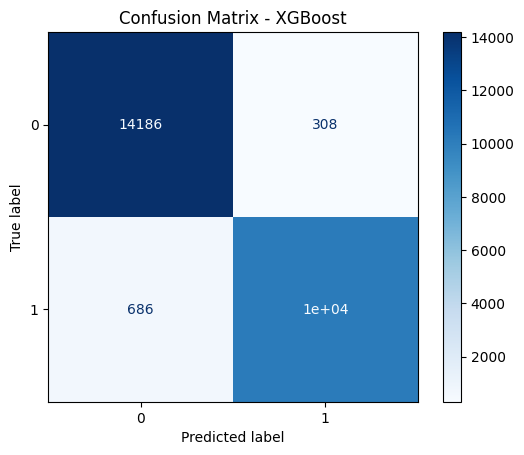

[[14186   308]
 [  686 10148]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14494
           1       0.97      0.94      0.95     10834

    accuracy                           0.96     25328
   macro avg       0.96      0.96      0.96     25328
weighted avg       0.96      0.96      0.96     25328



In [64]:
#Regular XGBoost
print('Evaluating XGBoost Model \n')

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
display(f"Model accuracy: {accuracy_xgb}")

precision_xgb = precision_score(y_test, y_pred_xgb)
display(f"Precision: {precision_xgb:.3f}")

recall_xgb = recall_score(y_test, y_pred_xgb, average="weighted")
display(f"Recall: {recall_xgb:.4f}")

f1_xgb = f1_score(y_test, y_pred_xgb, average="weighted")
display(f"f1: {f1_xgb:.4f}")


# Visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - XGBoost")  # Updated title
plt.show()

print(conf_matrix)

# Generate classification report
print(classification_report(y_test, y_pred_xgb))

#### RFE

Evaluating XGBoost Model with RFE 



'Model accuracy: 0.9442119393556538'

'Precision: 0.950'

'Recall: 0.9442'

'f1: 0.9441'

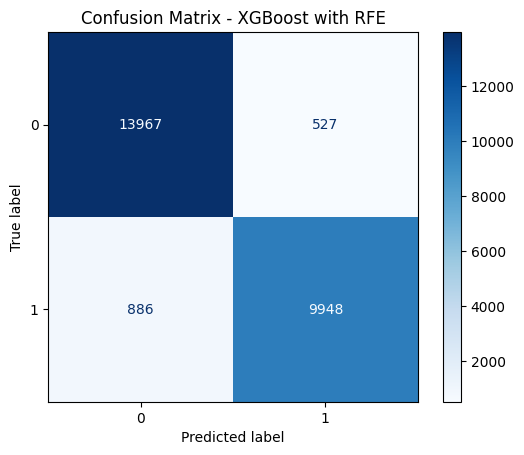

[[13967   527]
 [  886  9948]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14494
           1       0.95      0.92      0.93     10834

    accuracy                           0.94     25328
   macro avg       0.95      0.94      0.94     25328
weighted avg       0.94      0.94      0.94     25328



In [65]:
# Evaluate the model with RFE
print('Evaluating XGBoost Model with RFE \n')

accuracy_xgb_rfe = accuracy_score(y_test, rfe_y_pred_xgb)  # Changed to RFE variable
display(f"Model accuracy: {accuracy_xgb_rfe}")

precision_xgb_rfe = precision_score(y_test, rfe_y_pred_xgb)  # Changed to RFE variable
display(f"Precision: {precision_xgb_rfe:.3f}")

recall_xgb_rfe = recall_score(y_test, rfe_y_pred_xgb, average="weighted")  # Changed to RFE variable
display(f"Recall: {recall_xgb_rfe:.4f}")

f1_xgb_rfe = f1_score(y_test, rfe_y_pred_xgb, average="weighted")  # Changed to RFE variable
display(f"f1: {f1_xgb_rfe:.4f}")


# Visualize confusion matrix for Decision Tree
conf_matrix = confusion_matrix(y_test, rfe_y_pred_xgb)  # Changed to RFE variable
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - XGBoost with RFE")  # Updated title
plt.show()

print(conf_matrix)

# Generate classification report
print(classification_report(y_test, rfe_y_pred_xgb))  # Changed to RFE variable



### Neural Network Performance

#### Regular

792/792 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
792/792 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Evaluating Neural Network Model 



'Model accuracy: 0.9595704358812381'

'Precision: 0.977'

'Recall: 0.9596'

'f1: 0.9594'

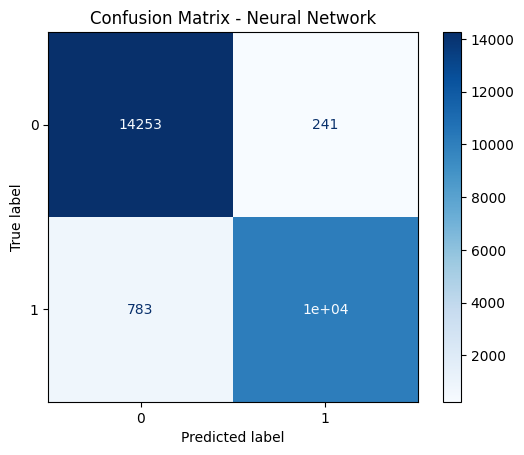

[[14253   241]
 [  783 10051]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14494
           1       0.98      0.93      0.95     10834

    accuracy                           0.96     25328
   macro avg       0.96      0.96      0.96     25328
weighted avg       0.96      0.96      0.96     25328



In [66]:
# Make predictions on the test data
pred_nn = nn_model.predict(X_test)
pred_nn_RFE = nn_RFE_model.predict(RFE_X_test)

# Convert probabilities to binary predictions (neural network returns a probability)
pred_nn = (pred_nn > 0.5).astype(int)
pred_nn_RFE = (pred_nn_RFE > 0.5).astype(int)

# Evaluate the model using Accuracy, Precision, Recall, and F1 Score
print('Evaluating Neural Network Model \n')

accuracy_nn = accuracy_score(y_test, pred_nn)
display(f"Model accuracy: {accuracy_nn}")

precision_nn = precision_score(y_test, pred_nn)
display(f"Precision: {precision_nn:.3f}")

recall_nn = recall_score(y_test, pred_nn, average="weighted")
display(f"Recall: {recall_nn:.4f}")

f1_nn = f1_score(y_test, pred_nn, average="weighted")
display(f"f1: {f1_nn:.4f}")

# Confusion Matrix for neural network without RFE
conf_matrix = confusion_matrix(y_test, pred_nn)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Neural Network")
plt.show()

print(conf_matrix)

# Generate classification report
print(classification_report(y_test, pred_nn))


#### RFE

'Model accuracy: 0.9449226152874289'

'Precision: 0.943'

'Recall: 0.9449'

'f1: 0.9449'

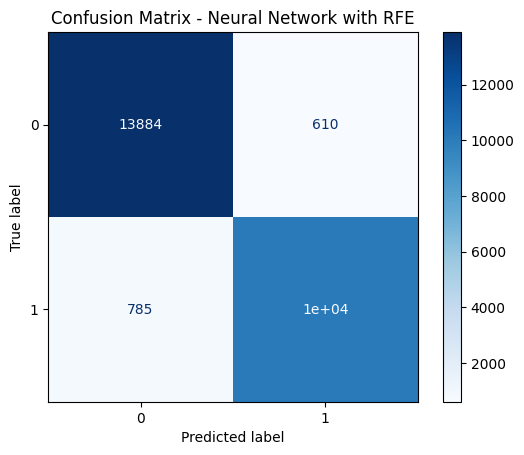

[[13884   610]
 [  785 10049]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     14494
           1       0.94      0.93      0.94     10834

    accuracy                           0.94     25328
   macro avg       0.94      0.94      0.94     25328
weighted avg       0.94      0.94      0.94     25328



In [67]:
# Display performance for neural network using RFE
accuracy_nn_RFE = accuracy_score(y_test, pred_nn_RFE)
display(f"Model accuracy: {accuracy_nn_RFE}")

precision_nn_RFE = precision_score(y_test, pred_nn_RFE)
display(f"Precision: {precision_nn_RFE:.3f}")

recall_nn_RFE = recall_score(y_test, pred_nn_RFE, average="weighted")
display(f"Recall: {recall_nn_RFE:.4f}")

f1_nn_RFE = f1_score(y_test, pred_nn_RFE, average="weighted")
display(f"f1: {f1_nn_RFE:.4f}")

# Confusion Matrix for neural network without RFE
conf_matrix = confusion_matrix(y_test, pred_nn_RFE)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Neural Network with RFE")
plt.show()

print(conf_matrix)

# Generate classification report
print(classification_report(y_test, pred_nn_RFE))

### Logistic Regression Performance

#### Regular

'Model accuracy: 0.8730259001895135'

'Precision: 0.867'

'Recall: 0.8730'

'f1: 0.8726'

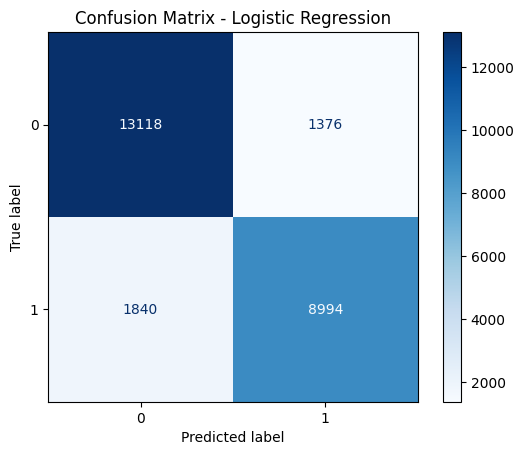

[[13118  1376]
 [ 1840  8994]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     14494
           1       0.87      0.83      0.85     10834

    accuracy                           0.87     25328
   macro avg       0.87      0.87      0.87     25328
weighted avg       0.87      0.87      0.87     25328



In [68]:
accuracy_logiReg = accuracy_score(y_test, pred_logiReg)
display(f"Model accuracy: {accuracy_logiReg}")

precision_logiReg = precision_score(y_test, pred_logiReg)
display(f"Precision: {precision_logiReg:.3f}")

recall_logiReg = recall_score(y_test, pred_logiReg, average="weighted")
display(f"Recall: {recall_logiReg:.4f}")

f1_logiReg = f1_score(y_test, pred_logiReg, average="weighted")
display(f"f1: {f1_logiReg:.4f}")


# Visualize confusion matrix for Linear Kernel SVM
conf_matrix = confusion_matrix(y_test, pred_logiReg)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

print(conf_matrix)

# Generate classification report
print(classification_report(y_test, pred_logiReg))


#### RFE

'Model accuracy: 0.8692356285533797'

'Precision: 0.861'

'Recall: 0.8692'

'f1: 0.8689'

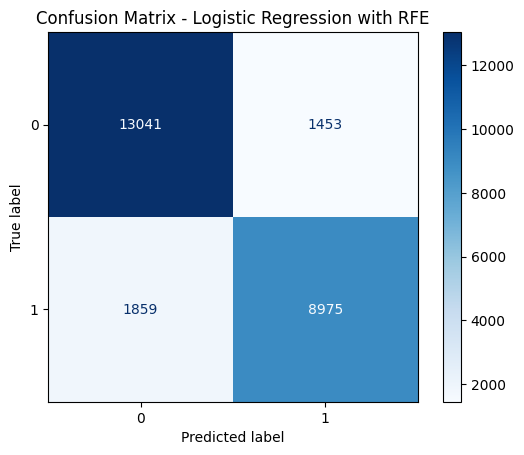

[[13041  1453]
 [ 1859  8975]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     14494
           1       0.86      0.83      0.84     10834

    accuracy                           0.87     25328
   macro avg       0.87      0.86      0.87     25328
weighted avg       0.87      0.87      0.87     25328



In [69]:
accuracy_logiReg_RFE = accuracy_score(y_test, pred_logiReg_RFE)
display(f"Model accuracy: {accuracy_logiReg_RFE}")

precision_logiReg_RFE = precision_score(y_test, pred_logiReg_RFE)
display(f"Precision: {precision_logiReg_RFE:.3f}")

recall_logiReg_RFE = recall_score(y_test, pred_logiReg_RFE, average="weighted")
display(f"Recall: {recall_logiReg_RFE:.4f}")

f1_logiReg_RFE = f1_score(y_test, pred_logiReg_RFE, average="weighted")
display(f"f1: {f1_logiReg_RFE:.4f}")


# Visualize confusion matrix for Linear Kernel SVM
conf_matrix = confusion_matrix(y_test, pred_logiReg_RFE)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression with RFE")
plt.show()

print(conf_matrix)

# Generate classification report
print(classification_report(y_test, pred_logiReg_RFE))

### Decision Tree Performance

#### Regular

Evaluating Decision Tree Classifier Model 



'Model accuracy: 0.949423562855338'

'Precision: 0.942'

'Recall: 0.9494'

'f1: 0.9494'

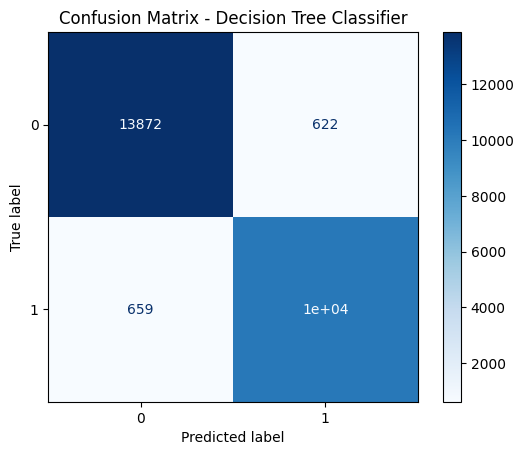

[[13872   622]
 [  659 10175]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     14494
           1       0.94      0.94      0.94     10834

    accuracy                           0.95     25328
   macro avg       0.95      0.95      0.95     25328
weighted avg       0.95      0.95      0.95     25328



In [70]:
# Evaluate the model
print('Evaluating Decision Tree Classifier Model \n')

accuracy_tree = accuracy_score(y_test, y_pred_treeGS)  # Changed pred_tree to y_pred_treeGS
display(f"Model accuracy: {accuracy_tree}")

precision_tree = precision_score(y_test, y_pred_treeGS)  # Changed pred_tree to y_pred_treeGS
display(f"Precision: {precision_tree:.3f}")

recall_tree = recall_score(y_test, y_pred_treeGS, average="weighted")  # Changed pred_tree to y_pred_treeGS
display(f"Recall: {recall_tree:.4f}")

f1_tree = f1_score(y_test, y_pred_treeGS, average="weighted")  # Changed pred_tree to y_pred_treeGS
display(f"f1: {f1_tree:.4f}")


# Visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_treeGS)  # Changed pred_tree to y_pred_treeGS
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.show()

print(conf_matrix)

# Generate classification report
print(classification_report(y_test, y_pred_treeGS))  # Changed pred_tree to y_pred_treeGS

#### RFE

Evaluating Decision Tree Classifier Model with RFE 



'Model accuracy: 0.9368288060644346'

'Precision: 0.934'

'Recall: 0.9368'

'f1: 0.9368'

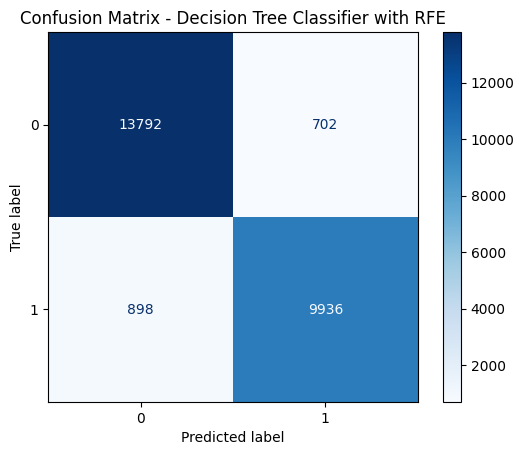

[[13792   702]
 [  898  9936]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     14494
           1       0.93      0.92      0.93     10834

    accuracy                           0.94     25328
   macro avg       0.94      0.93      0.94     25328
weighted avg       0.94      0.94      0.94     25328



In [71]:
# Evaluate the model with RFE
print('Evaluating Decision Tree Classifier Model with RFE \n')

accuracy_tree_rfe = accuracy_score(y_test, y_pred_treeGS_RFE)  # Changed to RFE variable
display(f"Model accuracy: {accuracy_tree_rfe}")

precision_tree_rfe = precision_score(y_test, y_pred_treeGS_RFE)  # Changed to RFE variable
display(f"Precision: {precision_tree_rfe:.3f}")

recall_tree_rfe = recall_score(y_test, y_pred_treeGS_RFE, average="weighted")  # Changed to RFE variable
display(f"Recall: {recall_tree_rfe:.4f}")

f1_tree_rfe = f1_score(y_test, y_pred_treeGS_RFE, average="weighted")  # Changed to RFE variable
display(f"f1: {f1_tree_rfe:.4f}")


# Visualize confusion matrix for Linear Kernel SVM
conf_matrix = confusion_matrix(y_test, y_pred_treeGS_RFE)  # Changed to RFE variable
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Decision Tree Classifier with RFE")  # Updated title
plt.show()

print(conf_matrix)

# Generate classification report
print(classification_report(y_test, y_pred_treeGS_RFE))  # Changed to RFE variable

### AdaBoost Performance

#### Regular

'Model accuracy: 0.9273926089703095'

'Precision: 0.928'

'Recall: 0.9274'

'f1: 0.9272'

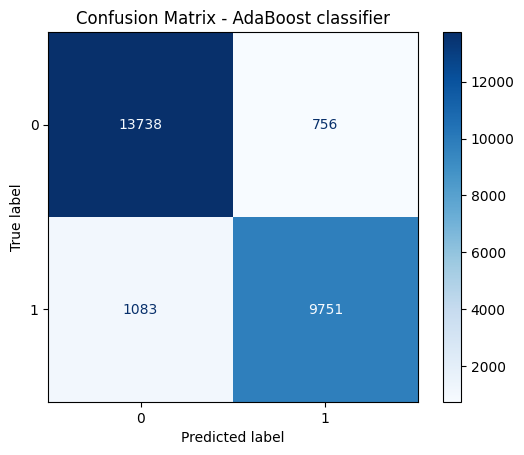

[[13738   756]
 [ 1083  9751]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     14494
           1       0.93      0.90      0.91     10834

    accuracy                           0.93     25328
   macro avg       0.93      0.92      0.93     25328
weighted avg       0.93      0.93      0.93     25328



In [72]:
accuracy_AdaBoost = accuracy_score(y_test, pred_AdaBoost)
display(f"Model accuracy: {accuracy_AdaBoost}")

precision_AdaBoost = precision_score(y_test, pred_AdaBoost)
display(f"Precision: {precision_AdaBoost:.3f}")

recall_AdaBoost = recall_score(y_test, pred_AdaBoost, average="weighted")
display(f"Recall: {recall_AdaBoost:.4f}")

f1_AdaBoost = f1_score(y_test, pred_AdaBoost, average="weighted")
display(f"f1: {f1_AdaBoost:.4f}")


# Visualize confusion matrix for Linear Kernel SVM
conf_matrix = confusion_matrix(y_test, pred_AdaBoost)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - AdaBoost classifier")
plt.show()

print(conf_matrix)

# Generate classification report
print(classification_report(y_test, pred_AdaBoost))


#### RFE

'Model accuracy: 0.9160217940619078'

'Precision: 0.910'

'Recall: 0.9160'

'f1: 0.9159'

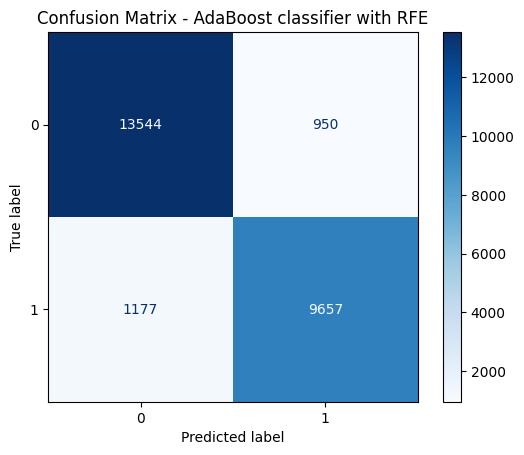

[[13544   950]
 [ 1177  9657]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     14494
           1       0.91      0.89      0.90     10834

    accuracy                           0.92     25328
   macro avg       0.92      0.91      0.91     25328
weighted avg       0.92      0.92      0.92     25328



In [73]:
accuracy_AdaBoost_RFE = accuracy_score(y_test, pred_AdaBoost_RFE)  # Changed to RFE variable
display(f"Model accuracy: {accuracy_AdaBoost_RFE}")

precision_AdaBoost_RFE = precision_score(y_test, pred_AdaBoost_RFE)  # Changed to RFE variable
display(f"Precision: {precision_AdaBoost_RFE:.3f}")

recall_AdaBoost_RFE = recall_score(y_test, pred_AdaBoost_RFE, average="weighted")  # Changed to RFE variable
display(f"Recall: {recall_AdaBoost_RFE:.4f}")

f1_AdaBoost_RFE = f1_score(y_test, pred_AdaBoost_RFE, average="weighted")  # Changed to RFE variable
display(f"f1: {f1_AdaBoost_RFE:.4f}")


conf_matrix = confusion_matrix(y_test, pred_AdaBoost_RFE)  # Changed to RFE variable
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - AdaBoost classifier with RFE")  # Updated title
plt.show()

print(conf_matrix)

# Generate classification report
print(classification_report(y_test, pred_AdaBoost_RFE))  # Changed to RFE variable

### SVM Performance

#### Regular

SVM Accuracy: 0.9521873025900189
SVM F1 Score: 0.9433768176929911
SVM Precision: 0.9559367004643229
SVM Recall: 0.9311426989108362


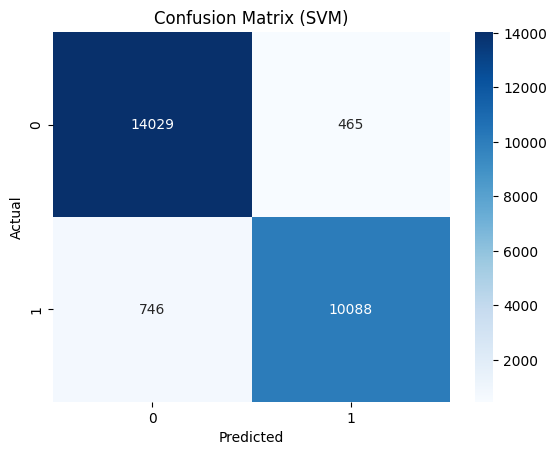

In [74]:
# --- SVM model Confusion Matrix
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)

print(f"SVM Accuracy: {svm_accuracy}")
print(f"SVM F1 Score: {svm_f1}")
print(f"SVM Precision: {svm_precision}")
print(f"SVM Recall: {svm_recall}")
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SVM)')
plt.show()

#### RFE

SVM Accuracy (RFE): 0.9380527479469362
SVM F1 Score (RFE): 0.9267130645990004
SVM Precision (RFE): 0.9380614657210402
SVM Recall (RFE): 0.9156359608639468


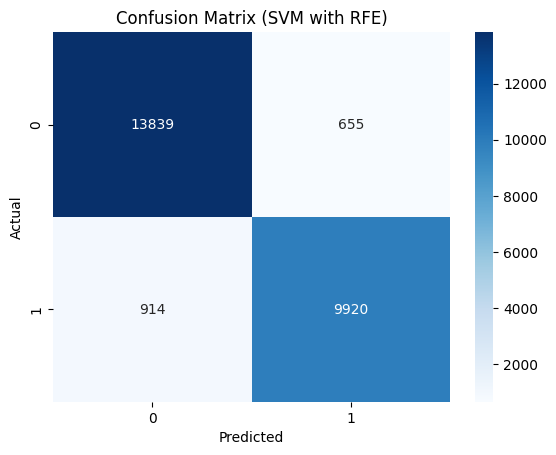

In [75]:
# --- SVM Model trained on RFE Dataset ---
rfe_svm_accuracy = accuracy_score(y_test, rfe_y_pred_svm)
rfe_svm_f1 = f1_score(y_test, rfe_y_pred_svm)
rfe_svm_precision = precision_score(y_test, rfe_y_pred_svm)
rfe_svm_recall = recall_score(y_test, rfe_y_pred_svm)
print(f"SVM Accuracy (RFE): {rfe_svm_accuracy}")
print(f"SVM F1 Score (RFE): {rfe_svm_f1}")
print(f"SVM Precision (RFE): {rfe_svm_precision}")
print(f"SVM Recall (RFE): {rfe_svm_recall}")


rfe_cm = confusion_matrix(y_test, rfe_y_pred_svm)
sns.heatmap(rfe_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SVM with RFE)')
plt.show()

### KNN Performance

#### Regular

Evaluating KNN Model 



'Model accuracy: 0.9267214150347441'

'Precision: 0.947'

'Recall: 0.9267'

'f1: 0.9263'

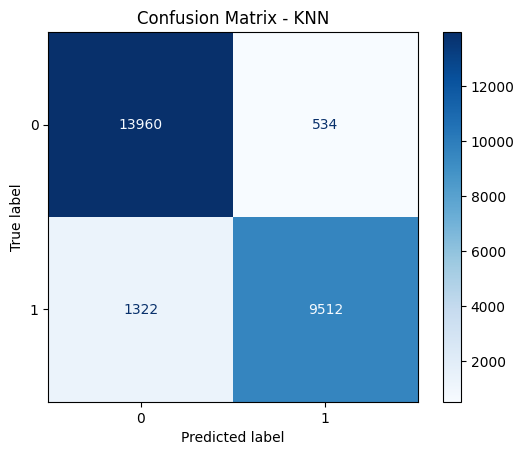

[[13960   534]
 [ 1322  9512]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94     14494
           1       0.95      0.88      0.91     10834

    accuracy                           0.93     25328
   macro avg       0.93      0.92      0.92     25328
weighted avg       0.93      0.93      0.93     25328



In [76]:
# Evaluate the model
print('Evaluating KNN Model \n')

accuracy_knn1 = accuracy_score(y_test, pred_knn1)
display(f"Model accuracy: {accuracy_knn1}")

precision_knn1 = precision_score(y_test, pred_knn1)
display(f"Precision: {precision_knn1:.3f}")

recall_knn1 = recall_score(y_test, pred_knn1, average="weighted")
display(f"Recall: {recall_knn1:.4f}")

f1_knn1 = f1_score(y_test, pred_knn1, average="weighted")
display(f"f1: {f1_knn1:.4f}")


# Visualize confusion matrix for Decision Tree
conf_matrix = confusion_matrix(y_test, pred_knn1)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - KNN")
plt.show()

print(conf_matrix)

# Generate classification report
print(classification_report(y_test, pred_knn1))

#### RFE

Evaluating KNN Model with RFE 



'Model accuracy: 0.9256948831332912'

'Precision: 0.934'

'Recall: 0.9257'

'f1: 0.9254'

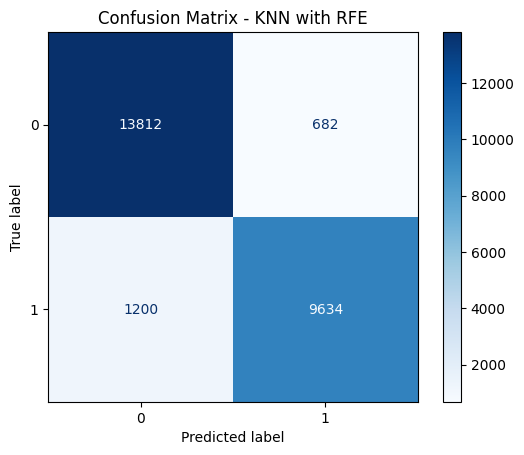

[[13812   682]
 [ 1200  9634]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94     14494
           1       0.93      0.89      0.91     10834

    accuracy                           0.93     25328
   macro avg       0.93      0.92      0.92     25328
weighted avg       0.93      0.93      0.93     25328



In [77]:
# Evaluate the model with RFE
print('Evaluating KNN Model with RFE \n')

accuracy_knn_rfe = accuracy_score(y_test, pred_knn_rfe)  # Changed to RFE variable
display(f"Model accuracy: {accuracy_knn_rfe}")

precision_knn_rfe = precision_score(y_test, pred_knn_rfe)  # Changed to RFE variable
display(f"Precision: {precision_knn_rfe:.3f}")

recall_knn_rfe = recall_score(y_test, pred_knn_rfe, average="weighted")  # Changed to RFE variable
display(f"Recall: {recall_knn_rfe:.4f}")

f1_knn_rfe = f1_score(y_test, pred_knn_rfe, average="weighted")  # Changed to RFE variable
display(f"f1: {f1_knn_rfe:.4f}")


# Visualize confusion matrix for KNN
conf_matrix = confusion_matrix(y_test, pred_knn_rfe)  # Changed to RFE variable
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - KNN with RFE")  # Updated title
plt.show()

print(conf_matrix)

# Generate classification report
print(classification_report(y_test, pred_knn_rfe))  # Changed to RFE variable

### Random Forest Performance

#### Regular

Evaluating Random Forest Model 



'Model accuracy: 0.9603600758054327'

'Precision: 0.970'

'Recall: 0.9604'

'f1: 0.9603'

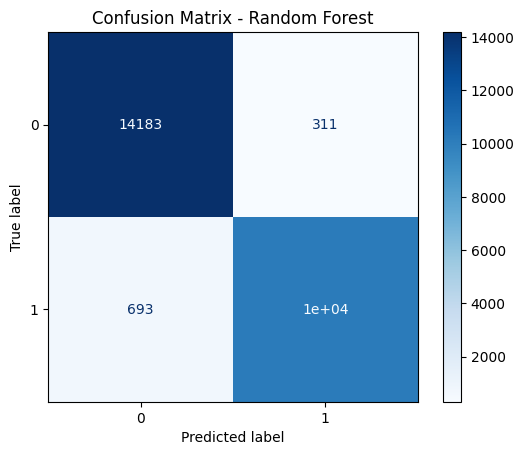

[[14183   311]
 [  693 10141]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14494
           1       0.97      0.94      0.95     10834

    accuracy                           0.96     25328
   macro avg       0.96      0.96      0.96     25328
weighted avg       0.96      0.96      0.96     25328



In [78]:
#Regular Random Forest
print('Evaluating Random Forest Model \n')

accuracy_rf = accuracy_score(y_test, y_pred_rf)
display(f"Model accuracy: {accuracy_rf}")

precision_rf = precision_score(y_test, y_pred_rf)
display(f"Precision: {precision_rf:.3f}")

recall_rf = recall_score(y_test, y_pred_rf, average="weighted")
display(f"Recall: {recall_rf:.4f}")

f1_rf = f1_score(y_test, y_pred_rf, average="weighted")
display(f"f1: {f1_rf:.4f}")


# Visualize confusion matrix for Random Forest
conf_matrix = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")  # Updated title
plt.show()

print(conf_matrix)

# Generate classification report
print(classification_report(y_test, y_pred_rf))

#### RFE

Evaluating Random Forest Model with RFE 



'Model accuracy: 0.9456727732154138'

'Precision: 0.951'

'Recall: 0.9457'

'f1: 0.9456'

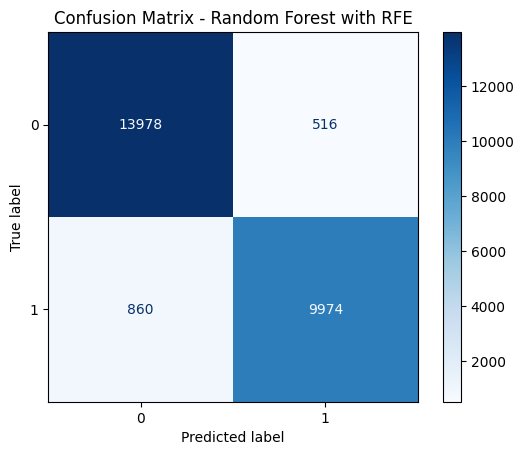

[[13978   516]
 [  860  9974]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14494
           1       0.95      0.92      0.94     10834

    accuracy                           0.95     25328
   macro avg       0.95      0.94      0.94     25328
weighted avg       0.95      0.95      0.95     25328



In [79]:
# Evaluate the model with RFE
print('Evaluating Random Forest Model with RFE \n')

accuracy_rf_rfe = accuracy_score(y_test, y_pred_rf_RFE)  # Changed to RFE variable
display(f"Model accuracy: {accuracy_rf_rfe}")

precision_rf_rfe = precision_score(y_test, y_pred_rf_RFE)  # Changed to RFE variable
display(f"Precision: {precision_rf_rfe:.3f}")

recall_rf_rfe = recall_score(y_test, y_pred_rf_RFE, average="weighted")  # Changed to RFE variable
display(f"Recall: {recall_rf_rfe:.4f}")

f1_rf_rfe = f1_score(y_test, y_pred_rf_RFE, average="weighted")  # Changed to RFE variable
display(f"f1: {f1_rf_rfe:.4f}")


# Visualize confusion matrix for Random Forest RFE
conf_matrix = confusion_matrix(y_test, y_pred_rf_RFE)  # Changed to RFE variable
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest with RFE")  # Updated title
plt.show()

print(conf_matrix)

# Generate classification report
print(classification_report(y_test, y_pred_rf_RFE))  # Changed to RFE variable


### Stacking Performance

#### Regular

Evaluating Stacking Model 



'Model accuracy: 0.9594914718888187'

'Precision: 0.964'

'Recall: 0.9595'

'f1: 0.9594'

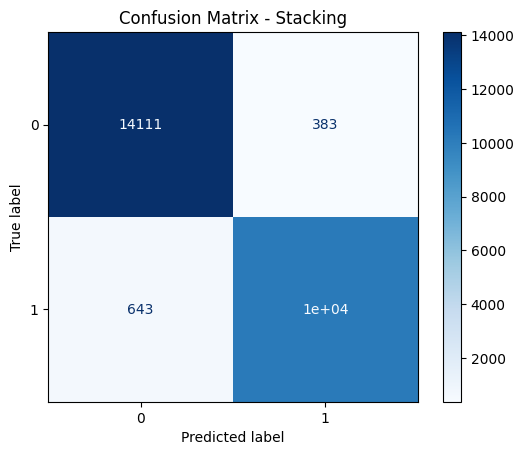

[[14111   383]
 [  643 10191]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     14494
           1       0.96      0.94      0.95     10834

    accuracy                           0.96     25328
   macro avg       0.96      0.96      0.96     25328
weighted avg       0.96      0.96      0.96     25328



In [80]:

#Regular Stacking
print('Evaluating Stacking Model \n')

accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
display(f"Model accuracy: {accuracy_stacking}")

precision_stacking = precision_score(y_test, y_pred_stacking)
display(f"Precision: {precision_stacking:.3f}")

recall_stacking = recall_score(y_test, y_pred_stacking, average="weighted")
display(f"Recall: {recall_stacking:.4f}")

f1_stacking = f1_score(y_test, y_pred_stacking, average="weighted")
display(f"f1: {f1_stacking:.4f}")


# Visualize confusion matrix for Stacking
conf_matrix = confusion_matrix(y_test, y_pred_stacking)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Stacking")  # Updated title
plt.show()

print(conf_matrix)

# Generate classification report
print(classification_report(y_test, y_pred_stacking))

#### RFE

Evaluating Stacking Model with RFE 



'Model accuracy: 0.9433038534428301'

'Precision: 0.945'

'Recall: 0.9433'

'f1: 0.9432'

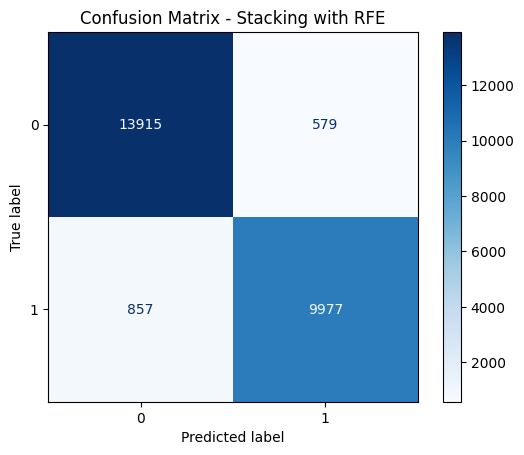

[[13915   579]
 [  857  9977]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14494
           1       0.95      0.92      0.93     10834

    accuracy                           0.94     25328
   macro avg       0.94      0.94      0.94     25328
weighted avg       0.94      0.94      0.94     25328



In [81]:
# Evaluate the model with RFE
print('Evaluating Stacking Model with RFE \n')

accuracy_stacking_rfe = accuracy_score(y_test, y_pred_stacking_RFE)  # Changed to RFE variable
display(f"Model accuracy: {accuracy_stacking_rfe}")

precision_stacking_rfe = precision_score(y_test, y_pred_stacking_RFE)  # Changed to RFE variable
display(f"Precision: {precision_stacking_rfe:.3f}")

recall_stacking_rfe = recall_score(y_test, y_pred_stacking_RFE, average="weighted")  # Changed to RFE variable
display(f"Recall: {recall_stacking_rfe:.4f}")

f1_stacking_rfe = f1_score(y_test, y_pred_stacking_RFE, average="weighted")  # Changed to RFE variable
display(f"f1: {f1_stacking_rfe:.4f}")


# Visualize confusion matrix for Stacking RFE
conf_matrix = confusion_matrix(y_test, y_pred_stacking_RFE)  # Changed to RFE variable
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Stacking with RFE")  # Updated title
plt.show()

print(conf_matrix)

# Generate classification report
print(classification_report(y_test, y_pred_stacking_RFE))  # Changed to RFE variable




### Final Plot Comparing all models Accuracy/ F1 Score


In [82]:
# Create a list of dictionaries, where each dictionary represents a model
model_data = [
    {'Model': 'XGBoost', 'Accuracy': accuracy_xgb, 'F1 Score': f1_xgb},
    {'Model': 'XGBoost RFE', 'Accuracy': accuracy_xgb_rfe, 'F1 Score': f1_xgb_rfe},
    {'Model': 'Neural Network', 'Accuracy': accuracy_nn, 'F1 Score': f1_nn},
    {'Model': 'Neural Network RFE', 'Accuracy': accuracy_nn_RFE, 'F1 Score': f1_nn_RFE},
    {'Model': 'Logistic Regression', 'Accuracy': accuracy_logiReg, 'F1 Score': f1_logiReg},
    {'Model': 'Logistic Regression RFE', 'Accuracy': accuracy_logiReg_RFE, 'F1 Score': f1_logiReg_RFE},
    {'Model': 'Decision Tree', 'Accuracy': accuracy_tree, 'F1 Score': f1_tree},
    {'Model': 'Decision Tree RFE', 'Accuracy': accuracy_tree_rfe, 'F1 Score': f1_tree_rfe},
    {'Model': 'AdaBoost', 'Accuracy': accuracy_AdaBoost, 'F1 Score': f1_AdaBoost},
    {'Model': 'AdaBoost RFE', 'Accuracy': accuracy_AdaBoost_RFE, 'F1 Score': f1_AdaBoost_RFE},
    {'Model': 'Random Forest', 'Accuracy': accuracy_rf, 'F1 Score': f1_rf},  # Updated to use pre-calculated accuracy_rf
    {'Model': 'Random Forest RFE', 'Accuracy': accuracy_rf_rfe, 'F1 Score': f1_rf_rfe},
    {'Model': 'Stacking', 'Accuracy': accuracy_stacking, 'F1 Score': f1_stacking},  # Updated to use pre-calculated accuracy_stacking
    {'Model': 'Stacking RFE', 'Accuracy': accuracy_stacking_rfe, 'F1 Score': f1_stacking_rfe},
    {'Model': 'KNN', 'Accuracy': accuracy_knn1, 'F1 Score': f1_score(y_test, pred_knn1)}, # Updated to use f1_score and pred_knn1
    {'Model': 'KNN RFE', 'Accuracy': accuracy_knn_rfe, 'F1 Score': f1_knn_rfe},
    {'Model': 'SVM', 'Accuracy': svm_accuracy , 'F1 Score': svm_f1},  # Updated to calculate accuracy and F1 score
    {'Model': 'SVM RFE', 'Accuracy': rfe_svm_accuracy, 'F1 Score': rfe_svm_f1}
]
# Create the DataFrame
model_df = pd.DataFrame(model_data)

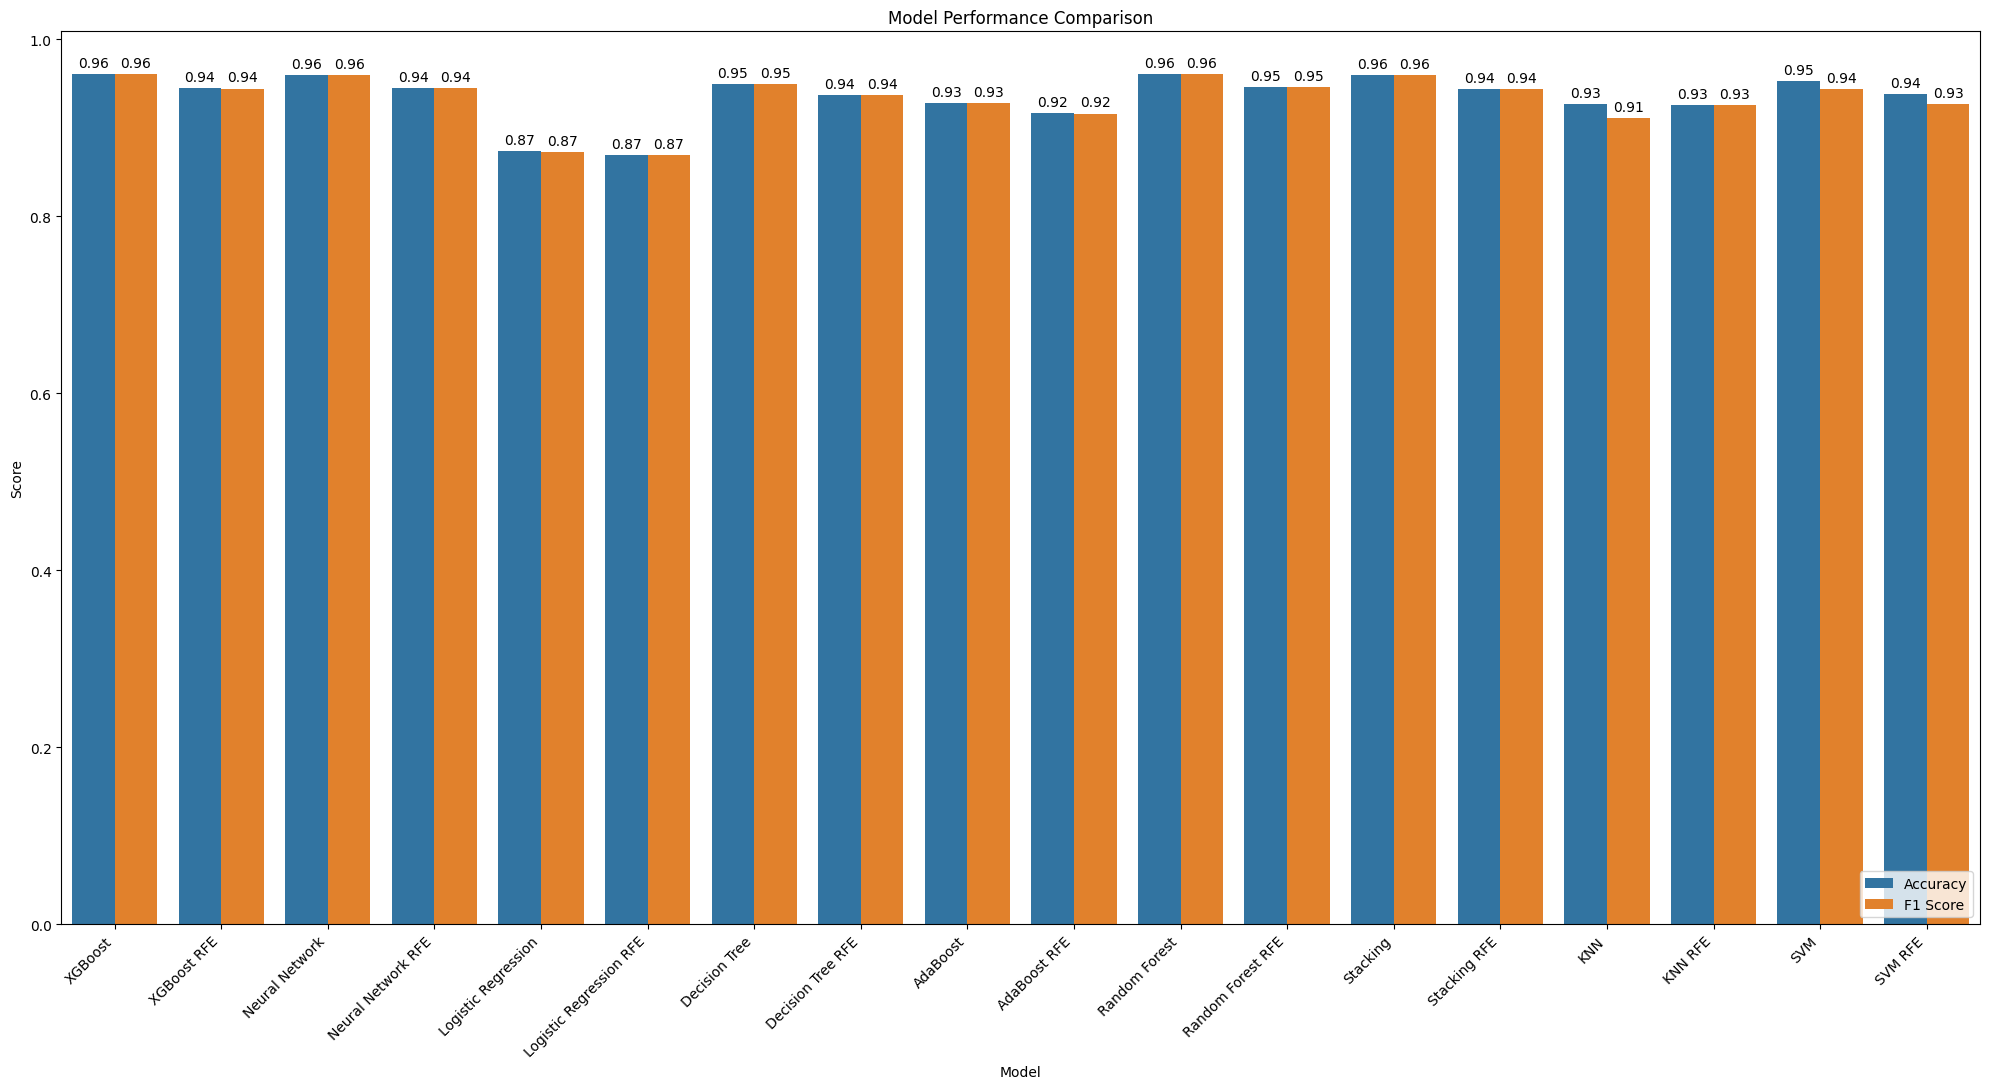

In [83]:
# Melt the DataFrame to make it suitable for plotting
melted_df = pd.melt(model_df, id_vars=['Model'], value_vars=['Accuracy', 'F1 Score'], var_name='Metric', value_name='Score')

# Create the bar plot
plt.figure(figsize=(20, 11))
ax = sns.barplot(x='Model', y='Score', hue='Metric', data=melted_df)
plt.title('Model Performance Comparison')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


# Add numbers above the bars, properly handling grouped bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)  #padding moves numbers up

# Move legend to bottom right
plt.legend(loc='lower right')

plt.show()

#### Plotting Time to Train

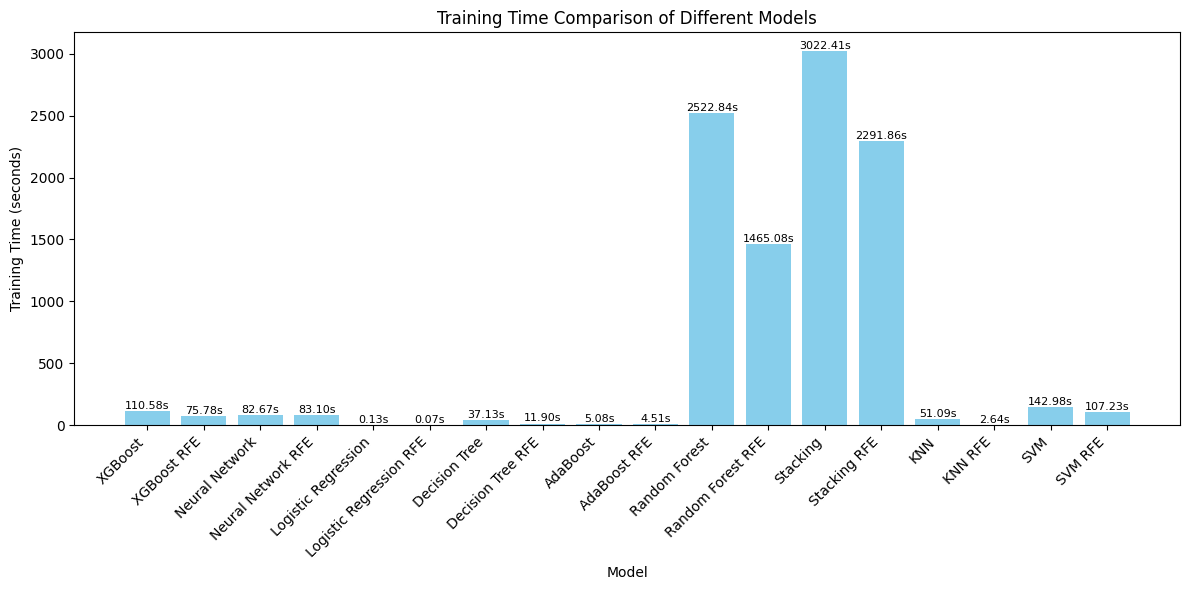

In [84]:
import matplotlib.pyplot as plt

# Model names and their corresponding training times (using variable names)
model_names = ['XGBoost', 'XGBoost RFE', 'Neural Network', 'Neural Network RFE',
              'Logistic Regression', 'Logistic Regression RFE', 'Decision Tree',
              'Decision Tree RFE', 'AdaBoost', 'AdaBoost RFE', 'Random Forest',
              'Random Forest RFE', 'Stacking', 'Stacking RFE', 'KNN', 'KNN RFE',
              'SVM', 'SVM RFE']

training_times = [elapsed_time_xgb, elapsed_time_xgb_rfe,
                  nn_train_time, nn_RFE_train_time,
                  elapsed_time_logiReg, elapsed_time_logiReg_RFE,
                  elapsed_time_treeGS, elapsed_time_treeGS_RFE,
                  elapsed_time_ada, elapsed_time_ada_RFE,
                  elapsed_time_rf, elapsed_time_rf_RFE,  # Updated variable names for Random Forest
                  elapsed_time_stacking, elapsed_time_stacking_RFE,  # Updated variable names for Stacking
                  elapsed_time_knn, elapsed_time_knn_rfe,
                  elapsed_time_svm, elapsed_time_svm_rfe]

# Create bar plot
plt.figure(figsize=(12, 6))
plt.bar(model_names, training_times, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time Comparison of Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add training times as text above each bar
for i, time in enumerate(training_times):
    plt.text(i, time + 0.5, f'{time:.2f}s', ha='center', va='bottom', fontsize=8)

plt.show()


### Interpreting Final Model (XGBoost)

<Figure size 1000x600 with 0 Axes>

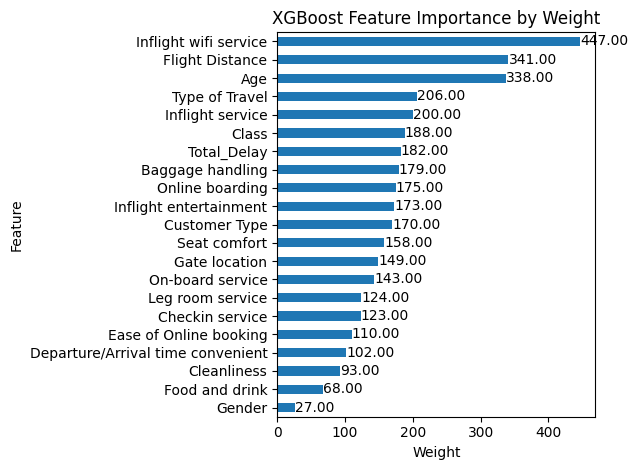

<Figure size 1000x600 with 0 Axes>

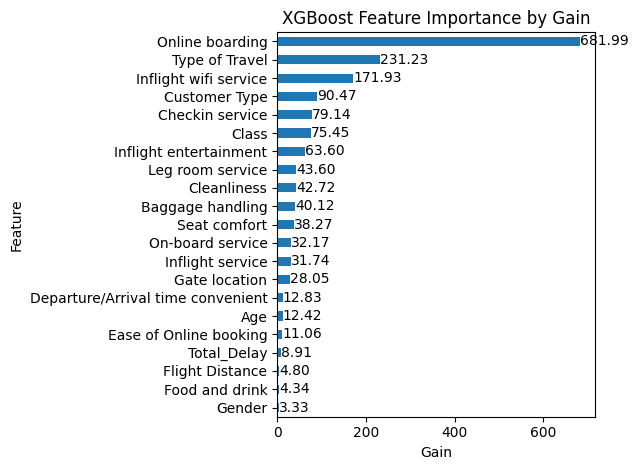

<Figure size 1000x600 with 0 Axes>

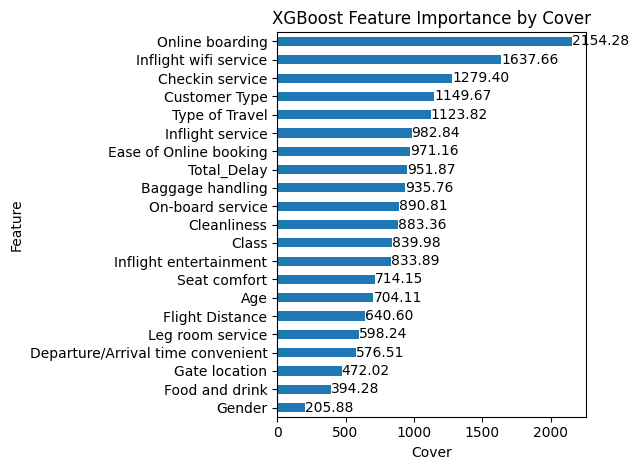

In [85]:
from xgboost import plot_importance


feature_names = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
                 'Flight Distance', 'Inflight wifi service',
                 'Departure/Arrival time convenient', 'Ease of Online booking',
                 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                 'Inflight entertainment', 'On-board service', 'Leg room service',
                 'Baggage handling', 'Checkin service', 'Inflight service',
                 'Cleanliness', 'Total_Delay', 'Total_Delay_log']

# Get the raw booster from the best model
booster = best_model_xgb.get_booster()

# Iterate over importance types ('weight', 'gain', 'cover')
for importance_type in ['weight', 'gain', 'cover']:
    # Get raw feature scores (e.g., {'f0': 0.2, 'f1': 0.4, ...})
    raw_importance = booster.get_score(importance_type=importance_type)

    # Remap from 'f0', 'f1', etc. to actual feature names
    mapped_importance = {feature_names[int(k[1:])]: v for k, v in raw_importance.items()}

    # Convert to a DataFrame for better visualization
    importance_df = pd.DataFrame.from_dict(mapped_importance, orient='index', columns=[importance_type])
    importance_df = importance_df.sort_values(by=importance_type, ascending=True)

    # Plot the feature importance for this importance type
    plt.figure(figsize=(10, 6))
    ax = importance_df.plot(kind='barh', legend=False)

    # Add numerical values next to the bars
    for i, v in enumerate(importance_df[importance_type]):
        ax.text(v + 0.01, i, f'{v:.2f}', va='center')  # Adjust the `+ 0.01` to place numbers properly

    plt.title(f"XGBoost Feature Importance by {importance_type.capitalize()}")
    plt.xlabel(importance_type.capitalize())
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

#### ROC and AUC for XGBoost Model

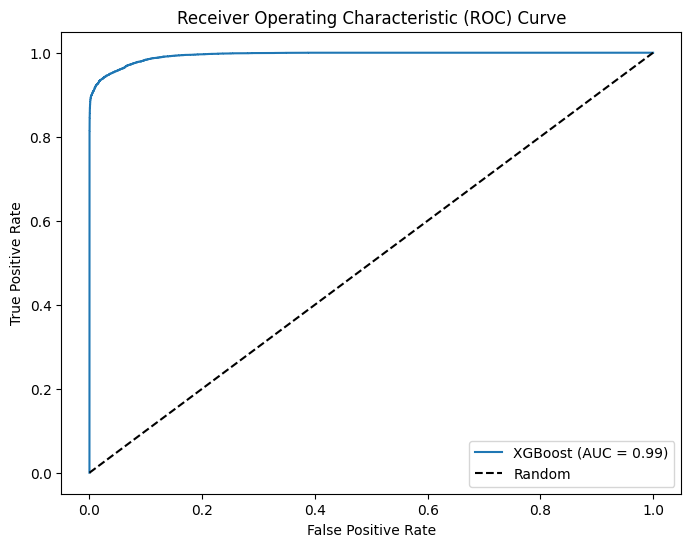

In [86]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class
y_probs = best_model_xgb.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


The Receiver Operating Characteristic (ROC) curve and Area Under the Curve (AUC) are used to evaluate the performance of the XGBoost model.

**ROC Curve:**

The ROC curve is a graphical representation of the model's ability to distinguish between the positive and negative classes at various probability thresholds. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR).

**AUC:**

The AUC is a single number that summarizes the overall performance of the model. It represents the area under the ROC curve, with a value of 1 indicating perfect classification and a value of 0.5 indicating random classification.

**Interpretation:**

The XGBoost model achieved an AUC of 0.99, indicating **exceptional** performance. This means that the model has a very high ability to distinguish between the positive and negative classes. The ROC curve shows the trade-off between TPR and FPR for different thresholds. A higher AUC and a curve that is closer to the top-left corner of the plot indicate better performance. In this case, an AUC of 0.99 suggests that the model is performing very well and has a low chance of misclassifying samples.